In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

In [4]:
data = pd.read_csv(r"C:\Users\harri\Desktop\DataScienceProj\005_CarPurchase\EVnICE.csv")

In [5]:
data.head(10)

,Unnamed: 0,year,carType
0,0,2011,ICE
1,1,2011,ICE
2,2,2011,ICE
3,3,2011,ICE
4,4,2011,ICE
5,5,2011,ICE
6,6,2011,ICE
7,7,2011,ICE
8,8,2011,ICE
9,9,2011,ICE


In [6]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
data["year"].value_counts()

2020    4252
2013    4238
2016    4235
2018    4201
2017    4198
2019    4191
2012    4180
2015    4179
2021    4153
2014    4149
2011    4095
Name: year, dtype: int64

In [8]:
data.head()

,year,carType
0,2011,ICE
1,2011,ICE
2,2011,ICE
3,2011,ICE
4,2011,ICE


In [10]:
import statsmodels.api as sm

In [11]:
data.groupby(["year"], as_index=False).count()

,year,carType
0,2011,4095
1,2012,4180
2,2013,4238
3,2014,4149
4,2015,4179
5,2016,4235
6,2017,4198
7,2018,4201
8,2019,4191
9,2020,4252


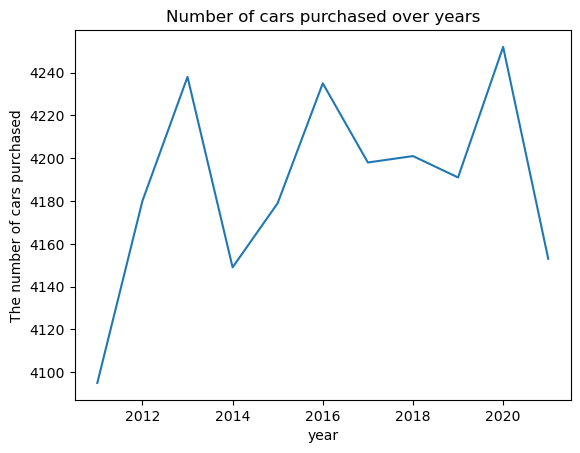

In [12]:
plt.title('Number of cars purchased over years')
plt.xlabel('year')
plt.ylabel('The number of cars purchased')
sns.lineplot(data=data.groupby(["year"], as_index=False).count(),x='year', y='carType')
plt.show()

**ICE**

In [14]:
ice = data.query('carType == "ICE"').groupby(["year"], as_index=False).count()
ice.rename(columns={"carType": "count"}, inplace=True)
ice


,year,count
0,2011,4092
1,2012,4170
2,2013,4217
3,2014,4098
4,2015,4126
5,2016,4164
6,2017,4139
7,2018,4149
8,2019,4093
9,2020,4142


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='count'>)

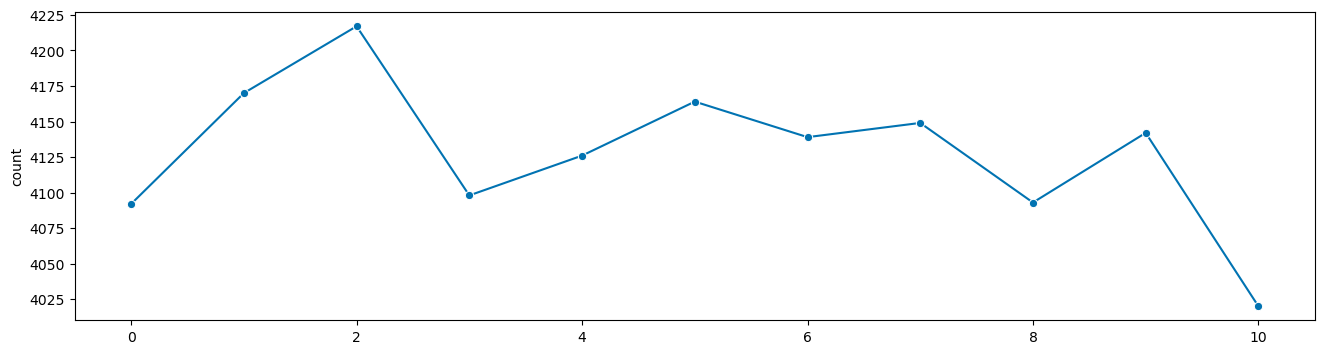

In [15]:
plot_series(ice["count"])

C:\Users\harri\AppData\Local\Temp\ipykernel_25500\2205618768.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of ICE Car Sales')

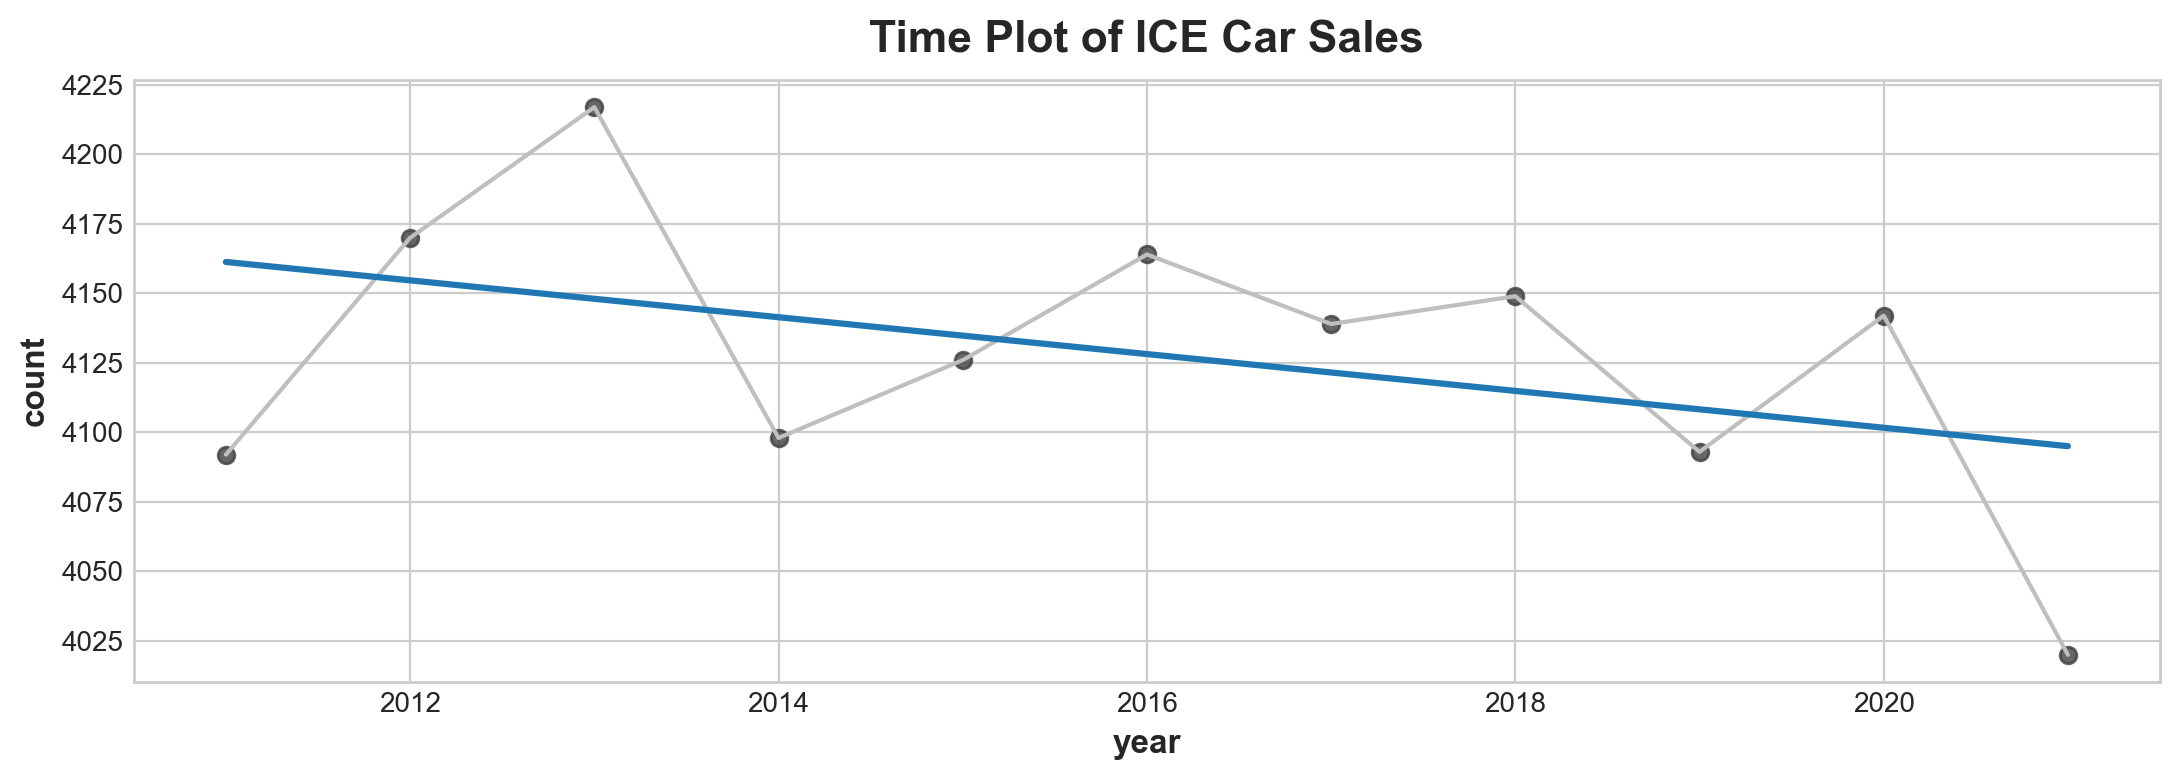

In [19]:

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('year', 'count', data=ice, color='0.75')
ax = sns.regplot(x='year', y='count', data=ice, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of ICE Car Sales')

In [20]:
ice['Lag_1'] = ice['count'].shift(1)
df = ice.reindex(columns=['count', 'Lag_1'])

df.head()

,count,Lag_1
0,4092,NaN
1,4170,4092.0
2,4217,4170.0
3,4098,4217.0
4,4126,4098.0


In [21]:
ice.head()

,year,count,Lag_1
0,2011,4092,NaN
1,2012,4170,4092.0
2,2013,4217,4170.0
3,2014,4098,4217.0
4,2015,4126,4098.0


Text(0.5, 1.0, 'Lag Plot of ICE Car Sales')

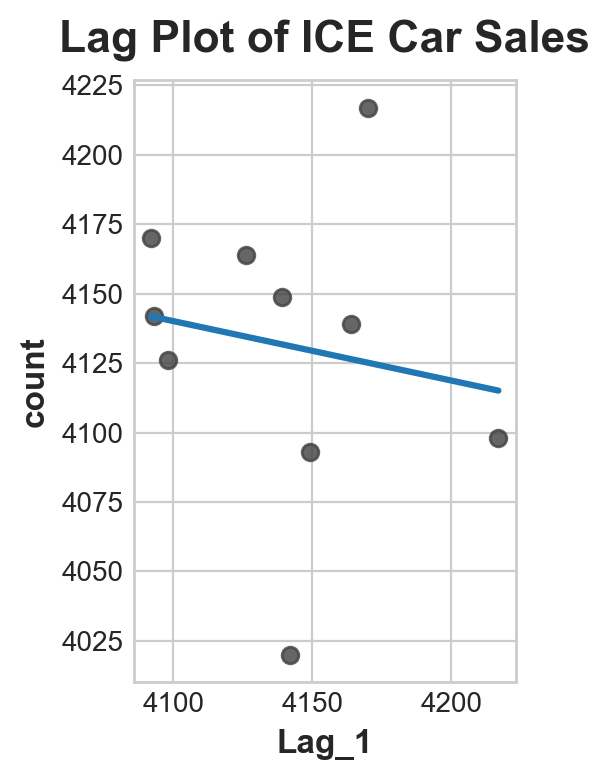

In [22]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='count', data=ice, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of ICE Car Sales')

https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series

In [24]:
from sklearn.linear_model import LinearRegression

# Training data
X = ice.loc[:, ['year']]  # features
y = ice.loc[:, 'count']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Time Plot ICE Cars')

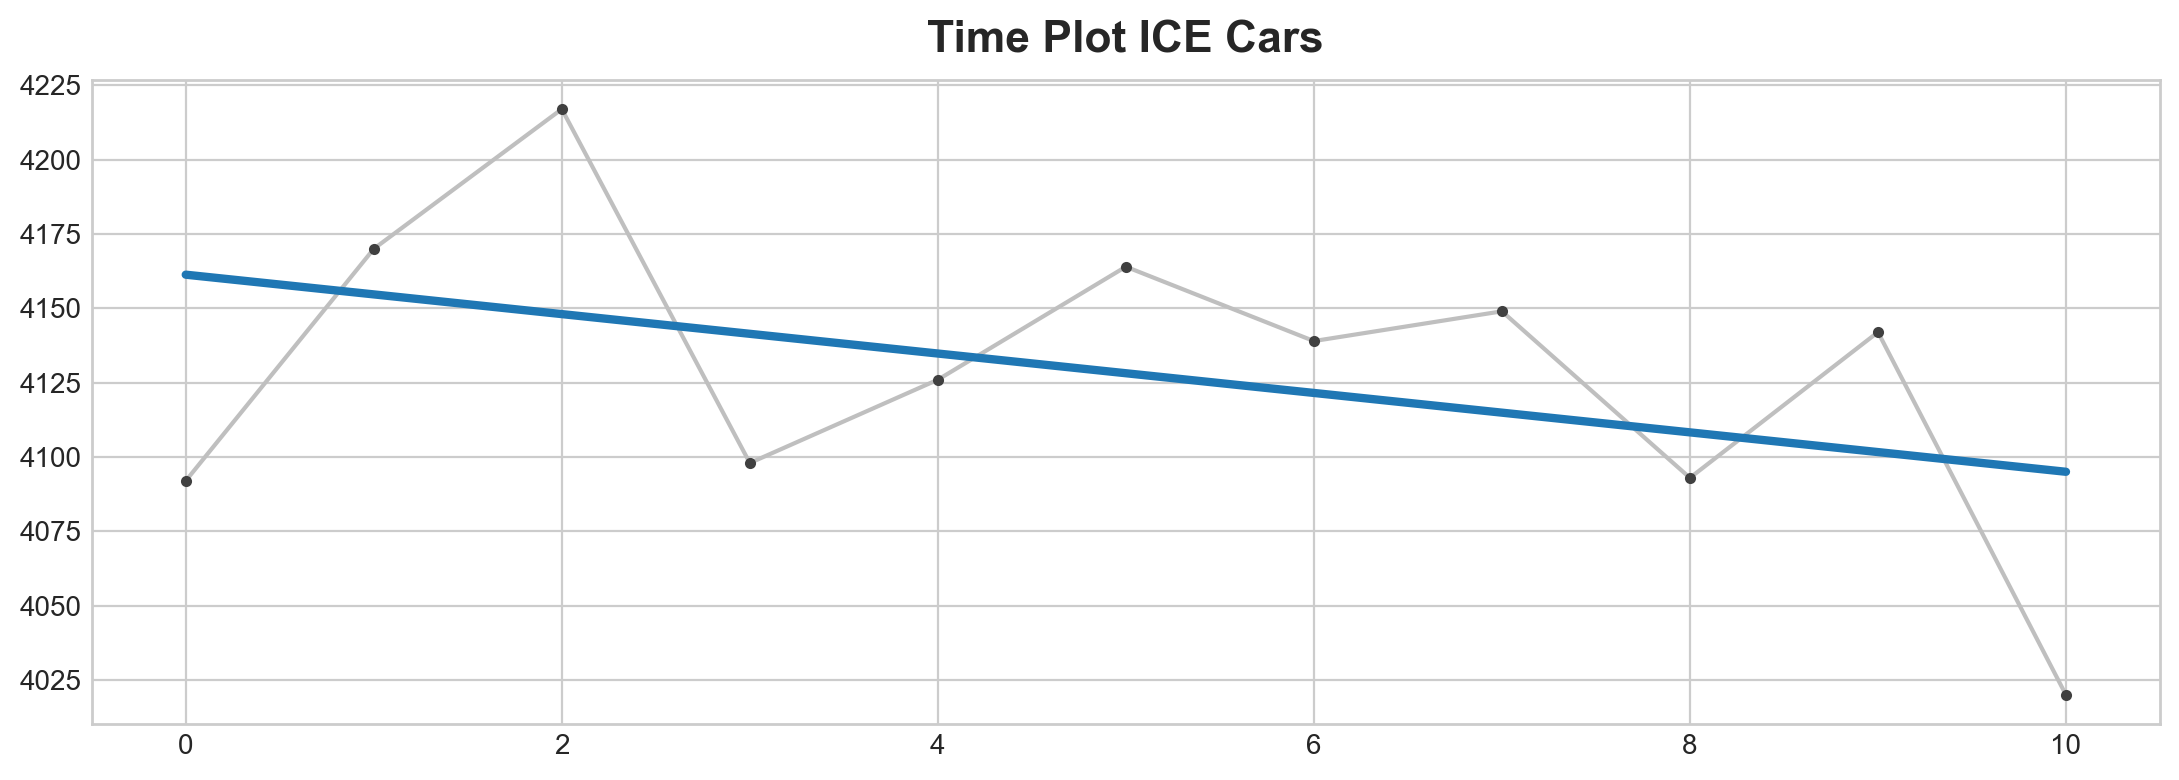

In [25]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot ICE Cars')

Lag Features

In [26]:
from sklearn.linear_model import LinearRegression

X = ice.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = ice.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of ICE Cars')

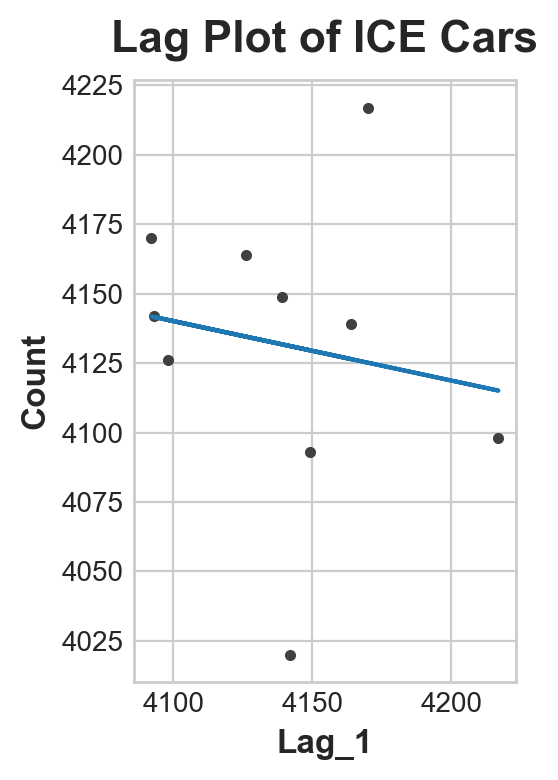

In [27]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Count')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of ICE Cars')

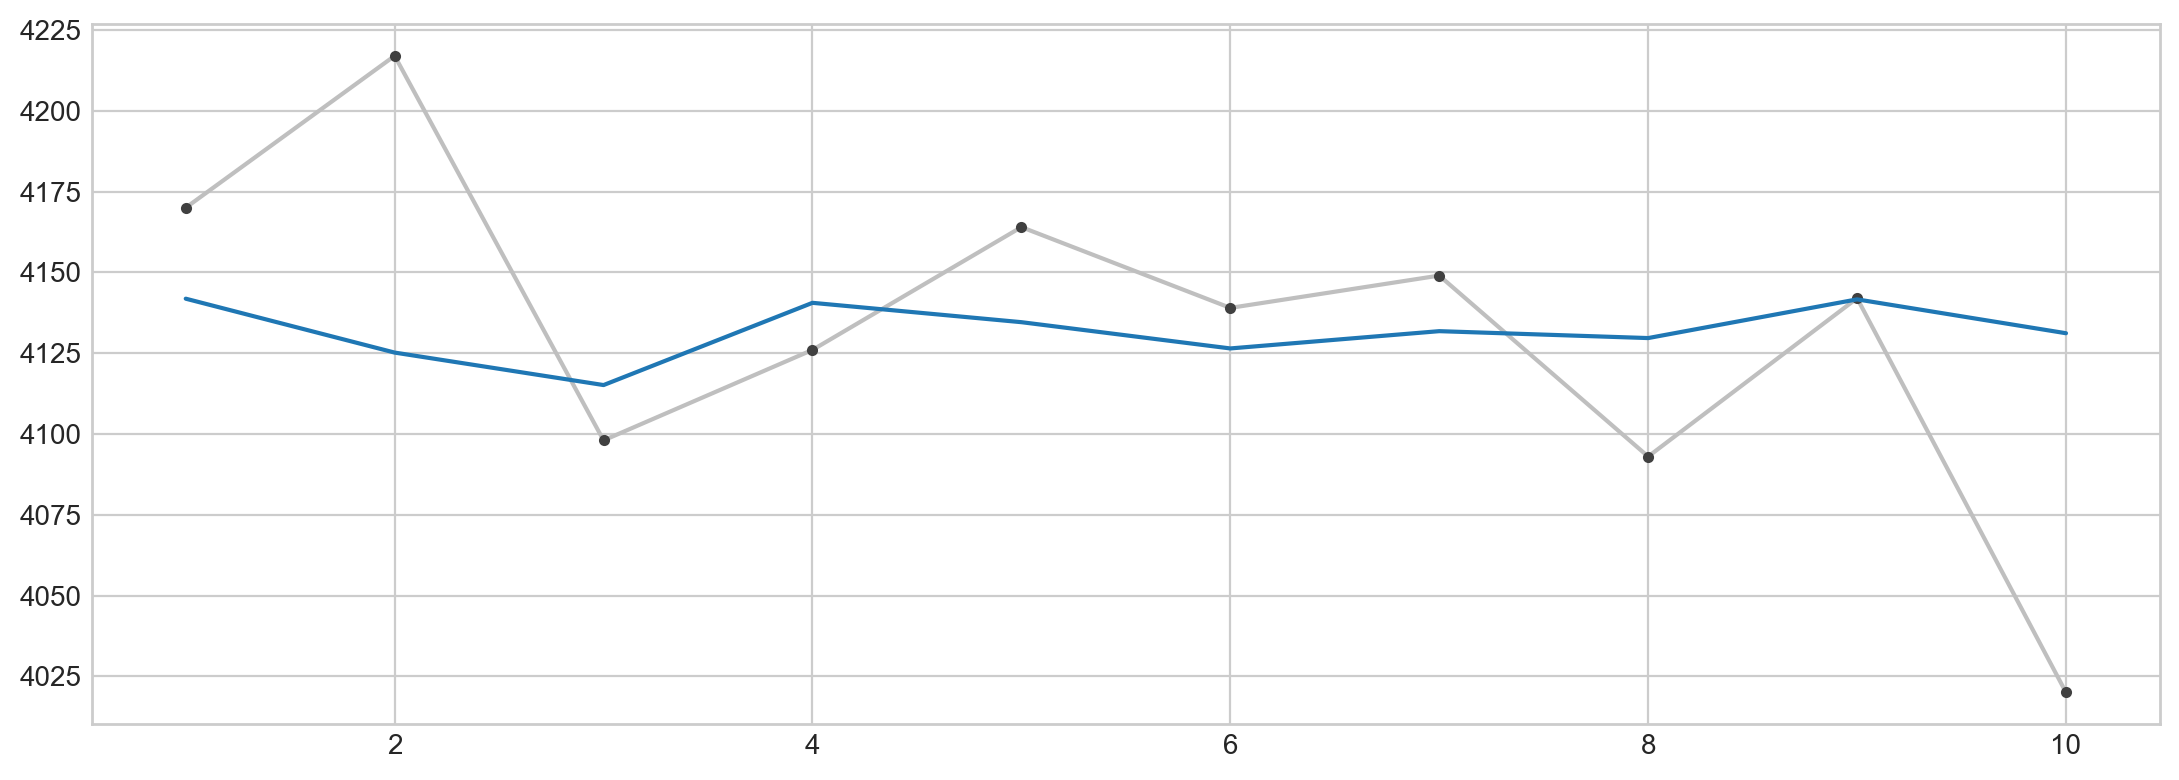

In [28]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [29]:
ice2 = data.query('carType == "ICE"').groupby(["year"], as_index=False).count()
ice2.rename(columns={"carType": "count"}, inplace=True)

In [ ]:
ice['Lag_1'] = ice['count'].shift(1)


# df = ice.reindex(columns=['count', 'Lag_1'])

df.head()

In [33]:
ice['Lag_2'] = ice['count'].shift(2)
ice['Lag_3'] = ice['count'].shift(3)

In [34]:
ice.head()

,year,count,Lag_1,Lag_2,Lag_3
0,2011,4092,NaN,NaN,NaN
1,2012,4170,4092.0,NaN,NaN
2,2013,4217,4170.0,4092.0,NaN
3,2014,4098,4217.0,4170.0,4092.0
4,2015,4126,4098.0,4217.0,4170.0


Univariate


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.api import (kpss, adfuller,
                              seasonal_decompose, STL)
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from pathlib import Path
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12, 5]

In [36]:
ice = data.query('carType == "ICE"').groupby(["year"], as_index=False).count()
ice.rename(columns={"carType": "count"}, inplace=True)
ice

,year,count
0,2011,4092
1,2012,4170
2,2013,4217
3,2014,4098
4,2015,4126
5,2016,4164
6,2017,4139
7,2018,4149
8,2019,4093
9,2020,4142


<AxesSubplot: title={'center': 'ICE Car Purchase'}>

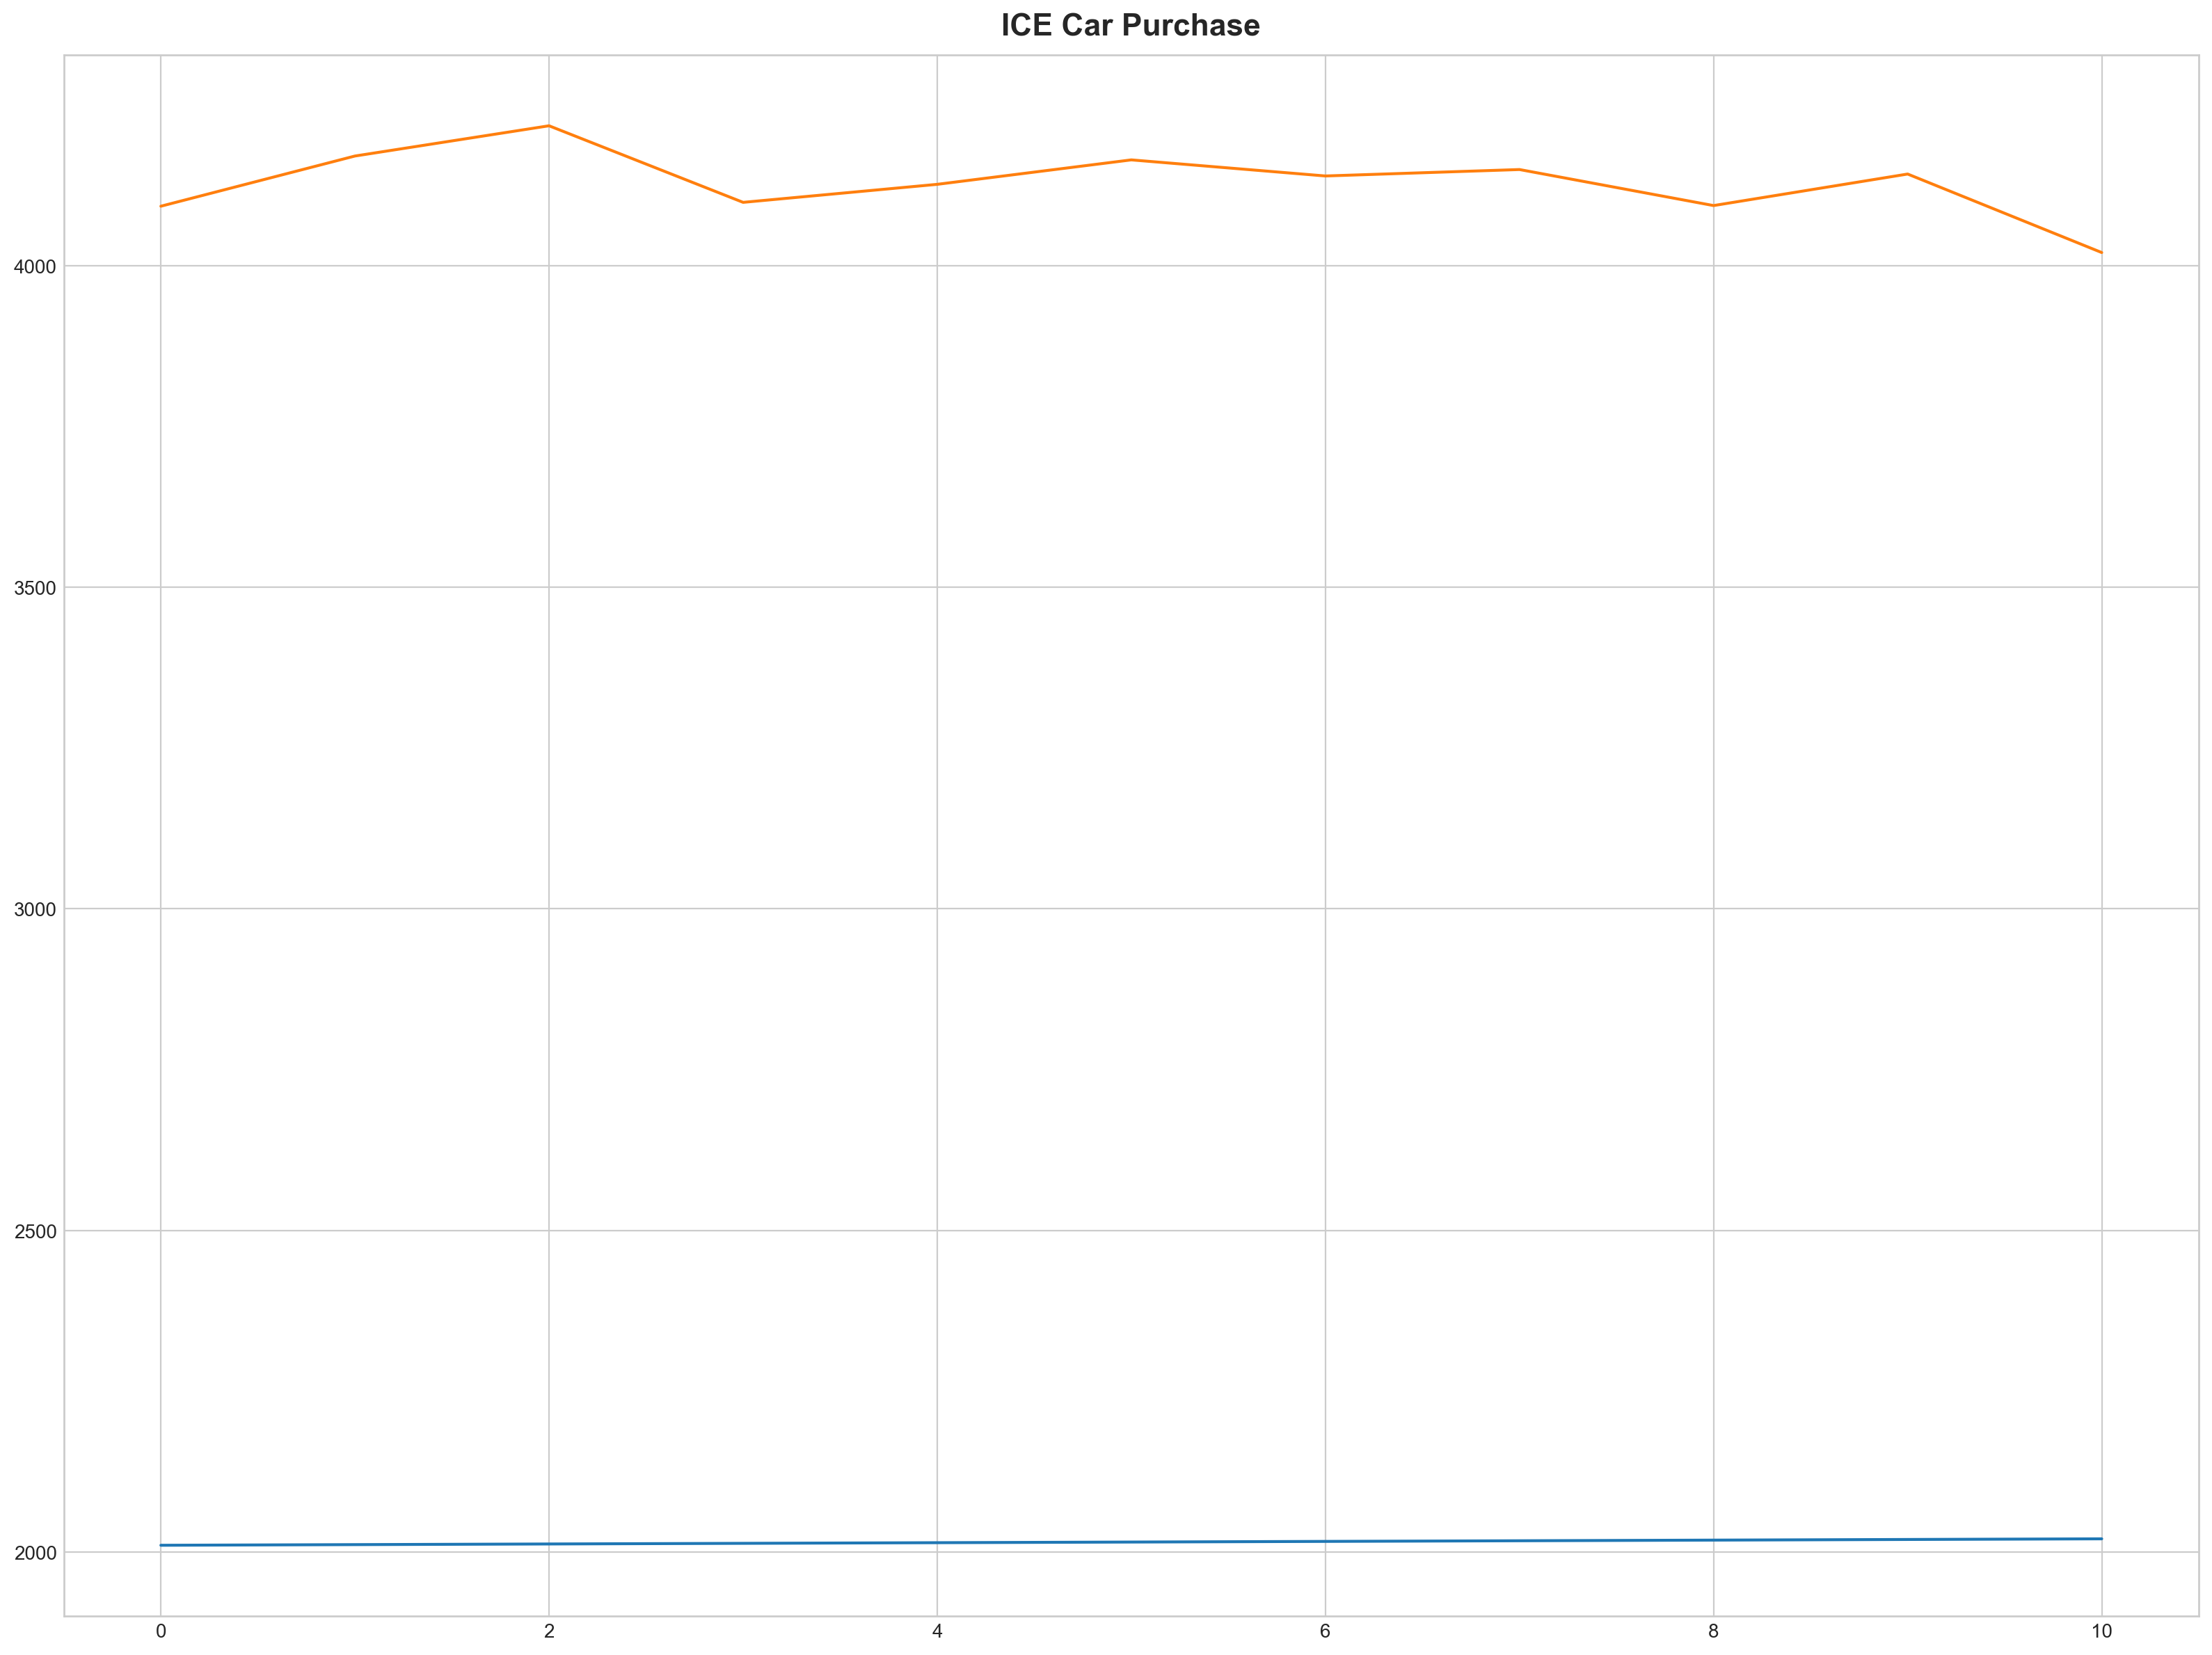

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ice.plot(title='ICE Car Purchase',
                        legend=False, ax=ax)

In [42]:
def split_data(data, test_split):
    l = len(data)
    t_idx = round(l*(1-test_split))
    train, test = data[ : t_idx], data[t_idx : ]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test

In [44]:
test_split = 0.2
ice_train, ice_test = split_data(ice, test_split)

train: 9 , test: 2


In [45]:
def check_stationarity(df):
    results = adfuller(df)[1:3]
    s = 'Non-Stationary'
    if results[0] < 0.05:
        s = 'Stationary'
    print(f"'{s}\t p-value:{results[0]} \tlags:{results[1]}")
    return (s, results[0])

In [46]:
def get_best_model(score, c='AIC'):
    initial_score = score[0][c]
    best_model = 0
    for k,v in score.items():
        if v[c] < initial_score:
            initial_score = v[c]
            best_model = k
    print(f'Best model: {best_model} with lowest {c}score: {initial_score}')
    return score[best_model]['model']

In [47]:
def plot_forecast(model, start, train, test):
    forecast = pd.DataFrame(model.forecast(test.shape[0]),index=test.index)
    ax = train.loc[start:].plot(style='--')
    test.plot(ax=ax)
    forecast.plot(ax=ax, style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    plt.show()

In [48]:
def combinator(items):
    combo = [i for i in product(*items)]
    return combo

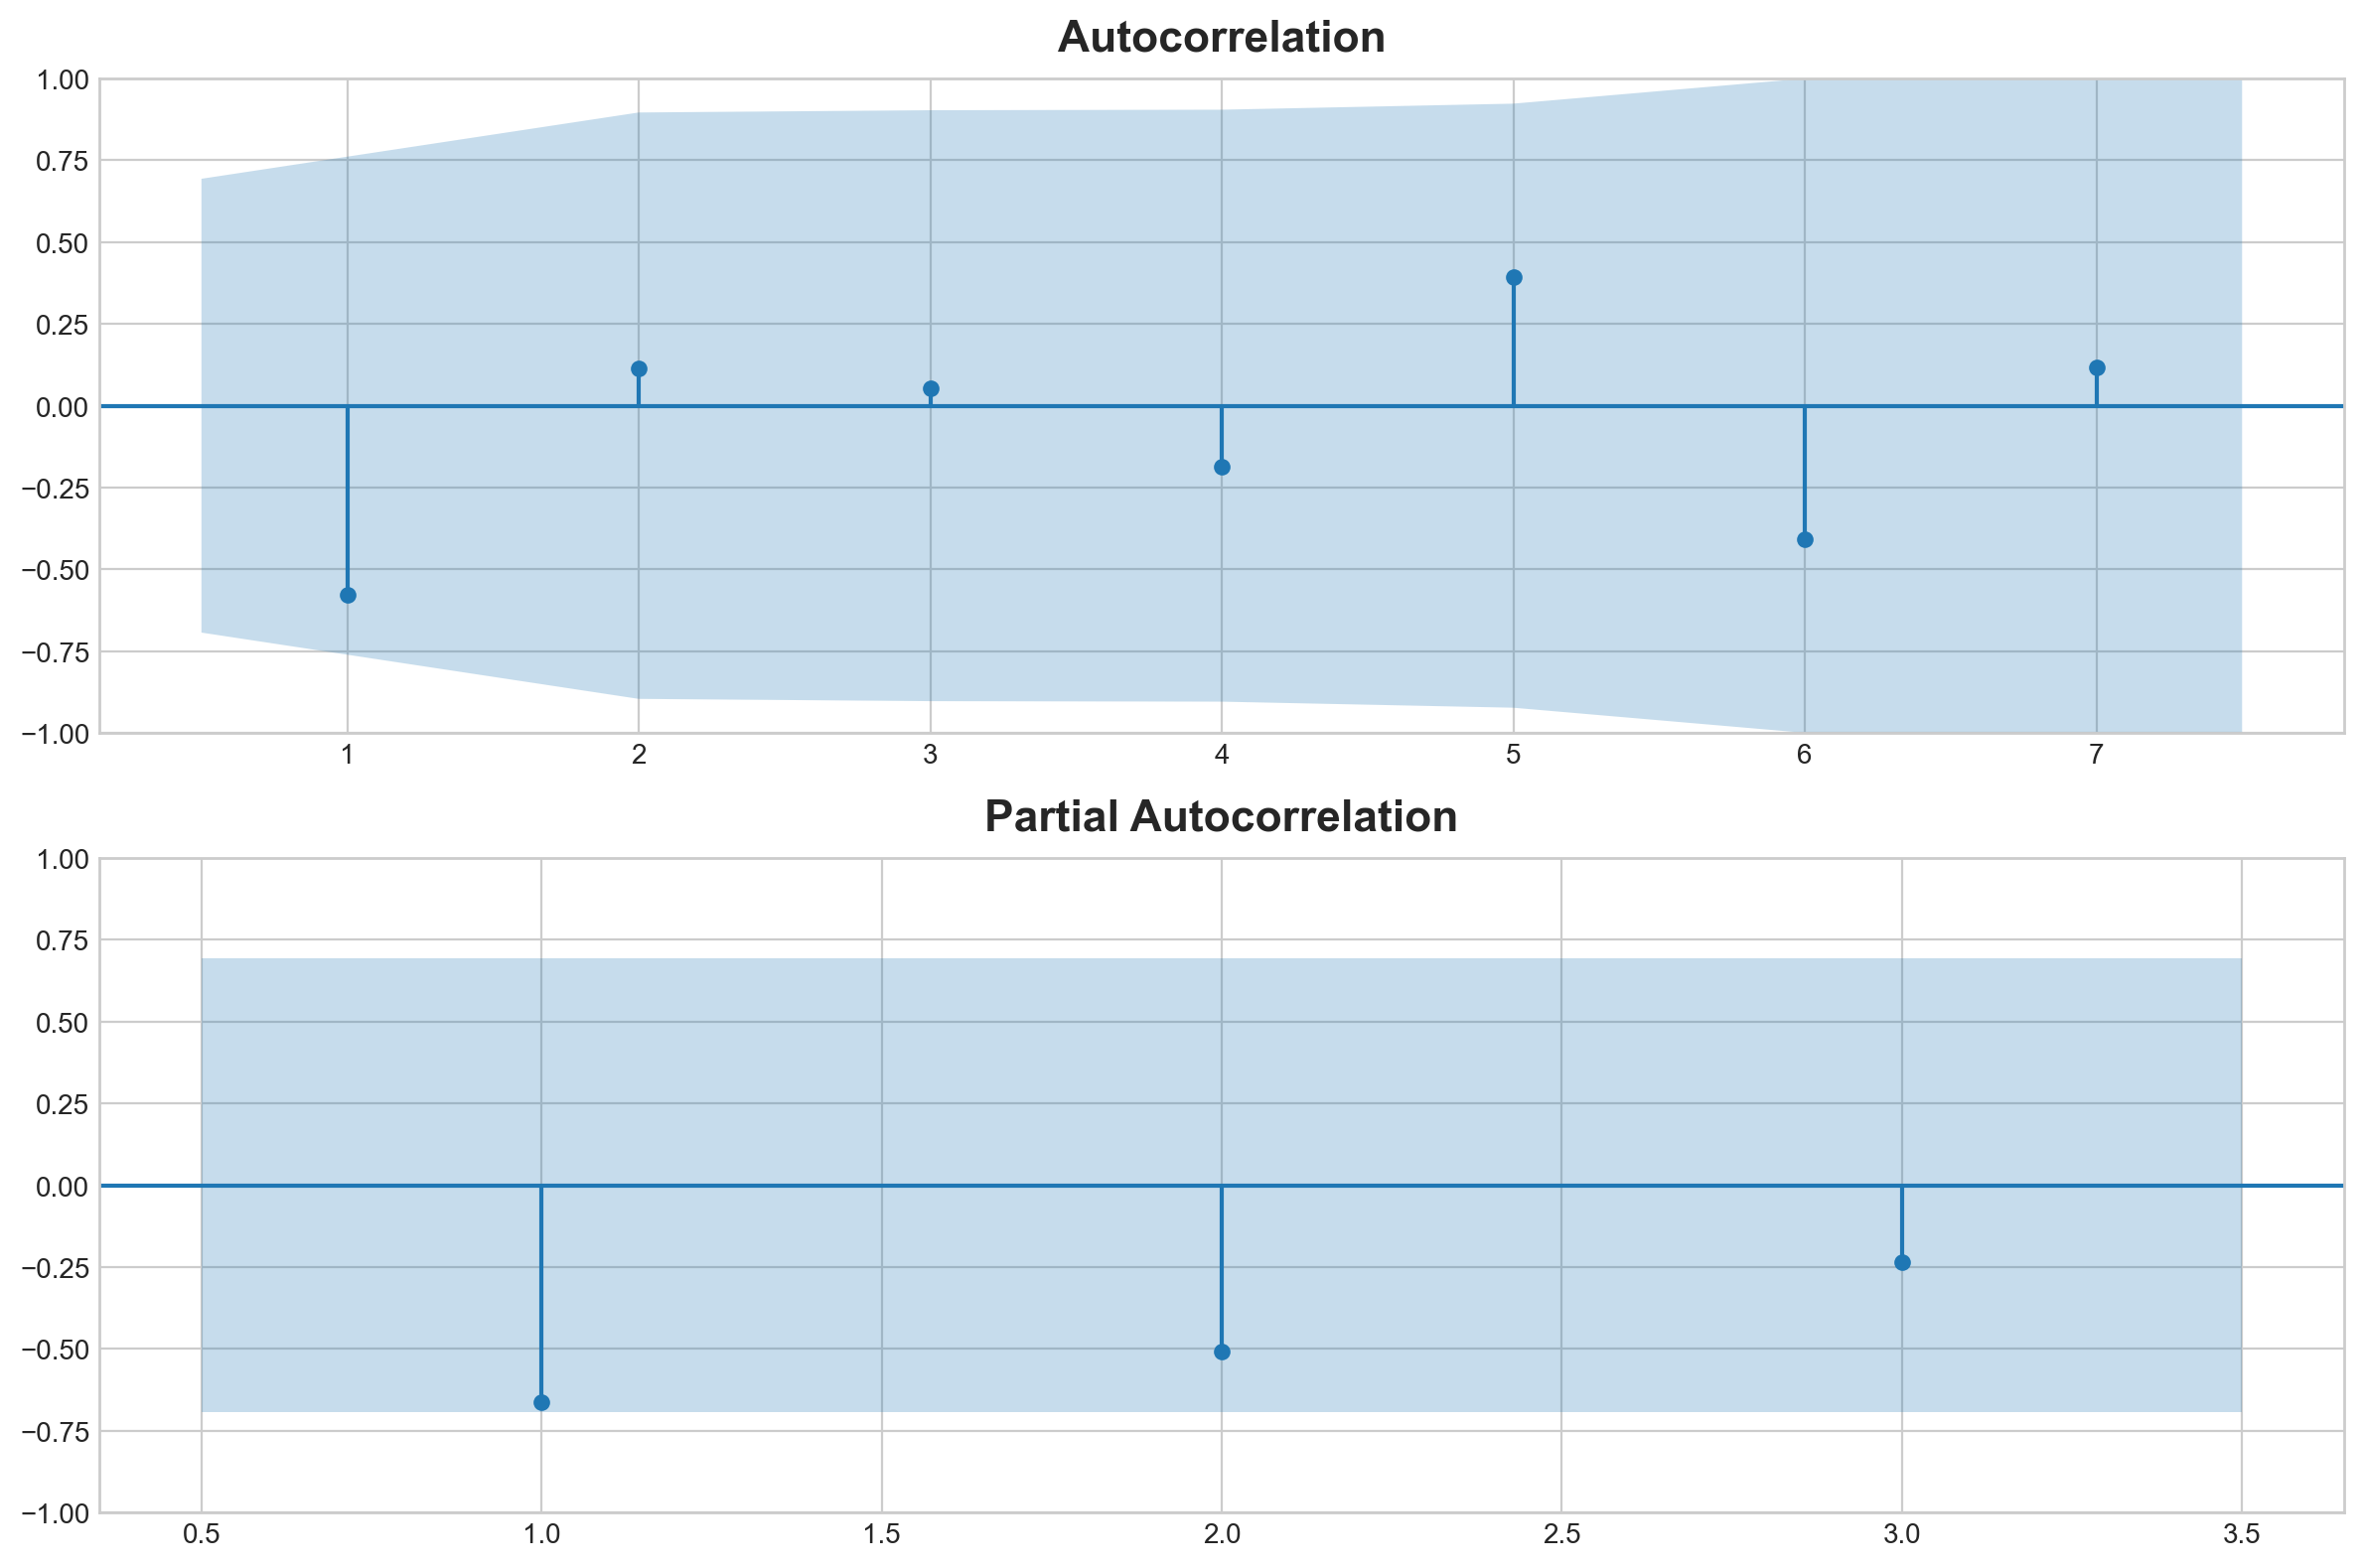

In [63]:
ice_diff = ice.diff().dropna()
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(ice_diff["count"].diff().diff().dropna(), zero=False, ax=ax[0])
plot_pacf(ice_diff["count"].diff().diff().dropna(), zero=False, lags=3,ax=ax[1])
plt.show()

In [50]:
ice_diff.head()

,year,count
1,1.0,78.0
2,1.0,47.0
3,1.0,-119.0
4,1.0,28.0
5,1.0,38.0


In [61]:
check_stationarity(ice_diff["count"].diff().diff().dropna())

'Stationary	 p-value:0.008371247446485154 	lags:2


('Stationary', 0.008371247446485154)

In [64]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [65]:
ice.head()

,year,count
0,2011,4092
1,2012,4170
2,2013,4217
3,2014,4098
4,2015,4126


<AxesSubplot: >

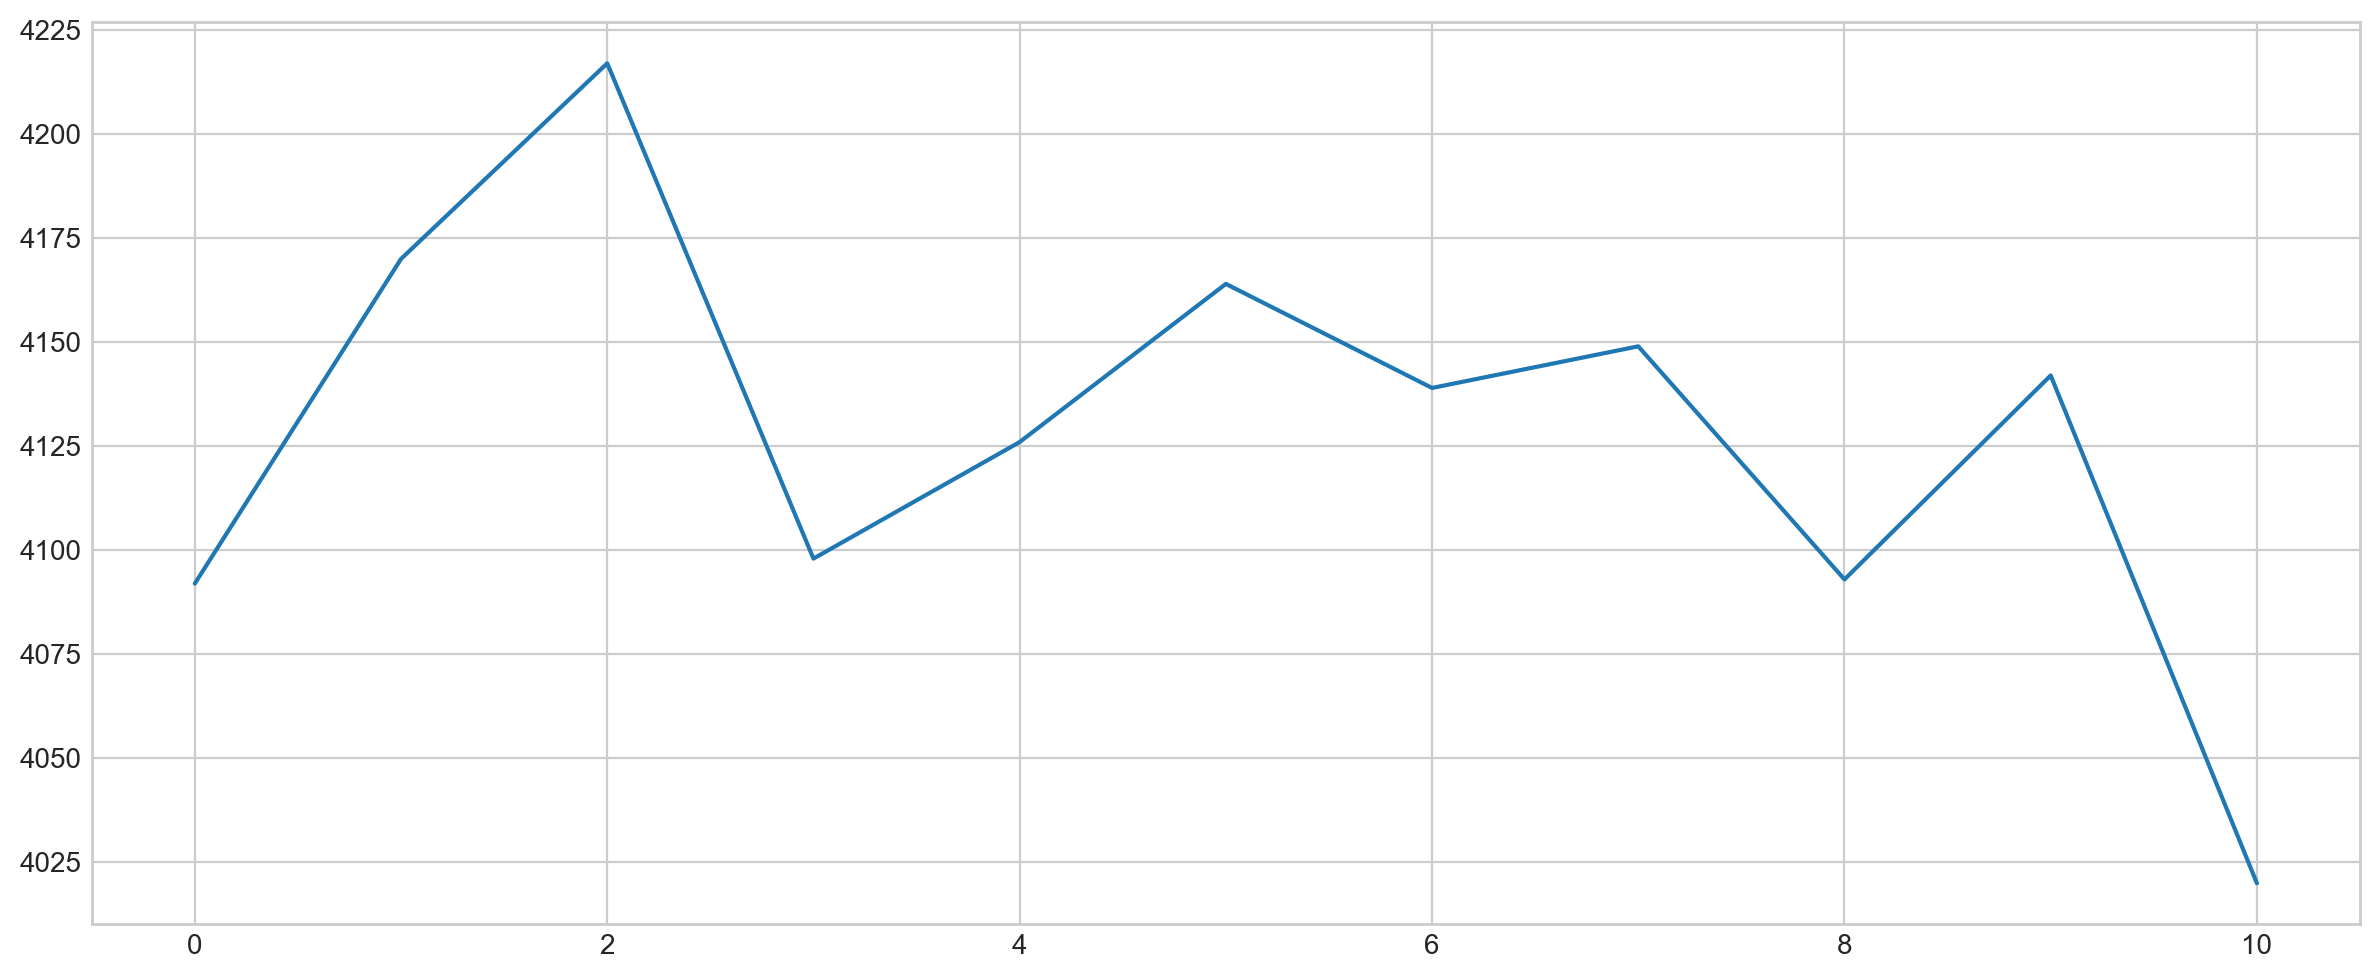

In [71]:
ice["count"].plot()

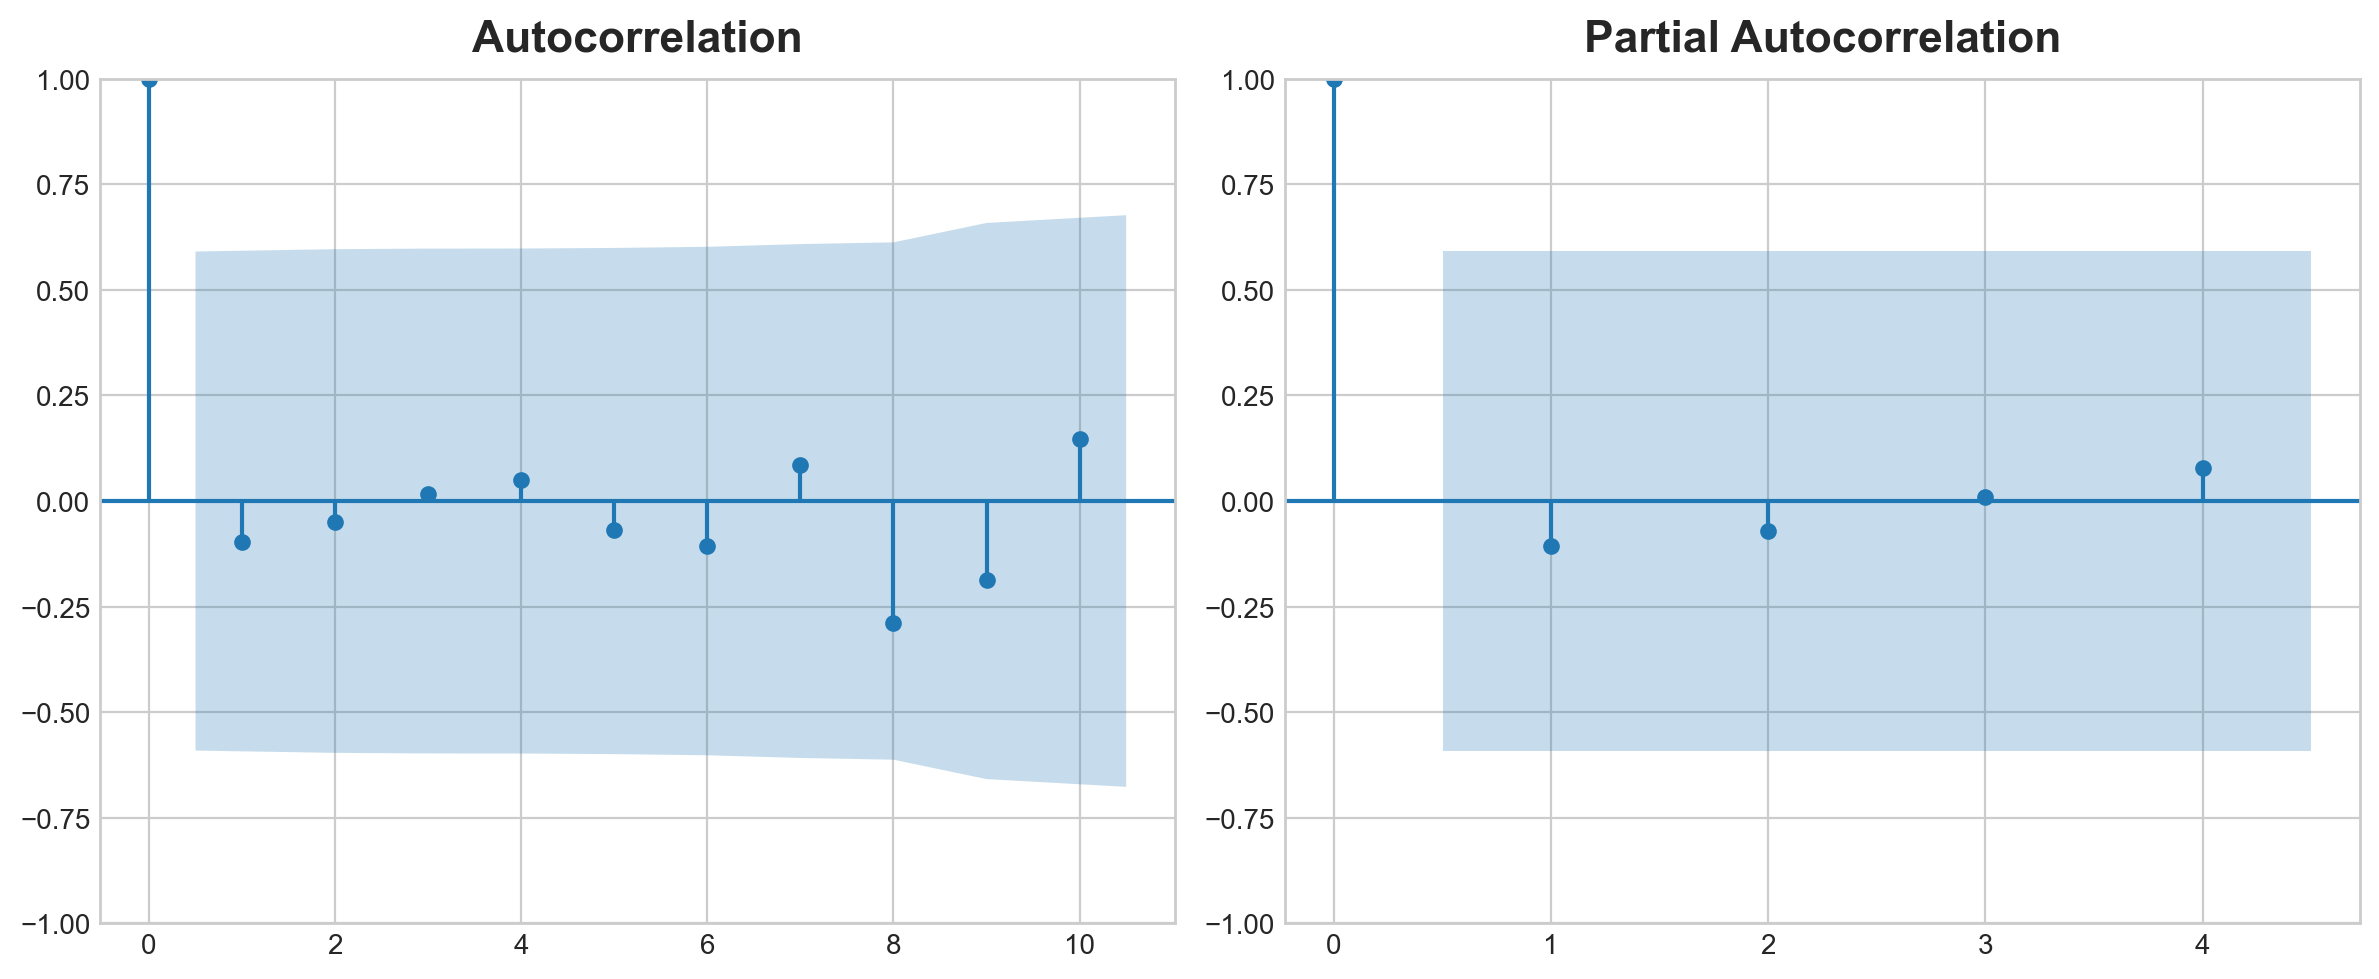

In [73]:
fig, ax = plt.subplots(1,2)
plot_acf(ice["count"], ax=ax[0])
plot_pacf(ice["count"], ax=ax[1], lags=4); plt.show()

In [74]:
model = ARIMA(ice["count"], order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                   11
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -54.945
Date:                Mon, 30 Jan 2023   AIC                            113.890
Time:                        20:29:40   BIC                            114.495
Sample:                             0   HQIC                           113.226
                                 - 11                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7622      0.925     -0.824      0.410      -2.576       1.051
sigma2      3049.7652   1656.654      1.841      0.066    -197.217    6296.748
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.92   Prob(JB):                         0.89
Heteroskedasticity (H):               1.05   Skew:                            -0.26
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
pv, dv, qv = [list(range(3))]*3
vals = combinator([pv, dv, qv ])
score = {}
for i, (p, d, q) in enumerate(vals):
    m = ARIMA(ice["count"], order=(p,d,q))
    res = m.fit()
    y = ice["count"].values.ravel()
    y_hat = res.forecast(steps=len(y))
    score[i] = {'order': (p,d,q),
                'AIC':res.aic,
                'RMSPE': rmspe(y, y_hat),
                'BIC': res.bic,
                'AICc':res.aicc,
                'RMSE' : rmse(y, y_hat),
                'MAPE' : mape(y, y_hat),
                'model': res}
best_m = get_best_model(score, 'AIC')

Best model: 8 with lowest AICscore: 108.6117184404062


In [76]:
pd.DataFrame(score).T.sort_values(by='AIC').reset_index() 

,index,order,AIC,RMSPE,BIC,AICc,RMSE,MAPE,model
0,8,"(0, 2, 2)",108.611718,0.574748,109.203392,113.411718,237.287391,0.05332,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
1,7,"(0, 2, 1)",109.271308,0.480061,109.665758,111.271308,198.814673,0.046501,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
2,15,"(1, 2, 0)",110.525343,1.164837,110.919792,112.525343,479.78547,0.108159,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
3,16,"(1, 2, 1)",110.661851,0.282833,111.253525,115.461851,117.619649,0.02607,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
4,24,"(2, 2, 0)",111.274532,0.908899,111.866206,116.074532,374.738927,0.085238,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
5,6,"(0, 2, 0)",111.385981,2.22978,111.583206,111.95741,917.068055,0.203888,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
6,25,"(2, 2, 1)",111.703789,0.273123,112.492687,121.703789,113.602959,0.024814,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
7,26,"(2, 2, 2)",113.85583,0.193267,114.841953,133.85583,80.537677,0.016705,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
8,4,"(0, 1, 1)",113.89007,0.129646,114.495241,115.604356,53.730484,0.01061,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
9,3,"(0, 1, 0)",114.679427,0.28577,114.982012,115.179427,118.920906,0.026066,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...


AUTORIMA

In [80]:
import pmdarima as pm

In [81]:
from sklearn.model_selection import train_test_split
train_ice, test_ice = train_test_split(ice, test_size=0.10, shuffle=False)

In [86]:
auto_model = pm.auto_arima(train_ice["count"].diff().diff().dropna(),seasonal=False,m=2,test='adf',stepwise=True, trace=True)
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85.232, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=86.166, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.925, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.111 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:                        SARIMAX   Log Likelihood                 -41.616
Date:                Mon, 30 Jan 2023   AIC                             85.232
Time:                        20:42:04   BIC                             85.178
Sample:                             0   HQIC                            84.564
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8539.4286   5314.871      1.607      0.108   -1877.527     1.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.85   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.17   Prob(JB):                         0.94
Heteroskedasticity (H):               0.20   Skew:                             0.27
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prophet

In [87]:
from prophet import Prophet

In [90]:
train_ice.columns = ['ds', 'y']
test_ice.columns = ['ds', 'y']

In [91]:
model = Prophet().fit(train_ice) 

20:46:04 - cmdstanpy - INFO - Chain [1] start processing
20:46:06 - cmdstanpy - INFO - Chain [1] done processing


MACHINE LEARNING

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [100]:
data = pd.read_csv(r"C:\Users\harri\Desktop\DataScienceProj\005_CarPurchase\EVnICE.csv", index_col="year")

In [101]:
data.head()

,Unnamed: 0,carType
year,,
2011,0,ICE
2011,1,ICE
2011,2,ICE
2011,3,ICE
2011,4,ICE


In [102]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [103]:
data.head()

,carType
year,
2011,ICE
2011,ICE
2011,ICE
2011,ICE
2011,ICE


In [115]:
data =data.groupby(["year"], as_index=True).count()

In [116]:
data.head()

,y
year,
2011,4095
2012,4180
2013,4238
2014,4149
2015,4179


In [117]:
data.columns = ["y"]

In [119]:
data.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='year')

<AxesSubplot: title={'center': 'ICE Car purchase'}, xlabel='year'>

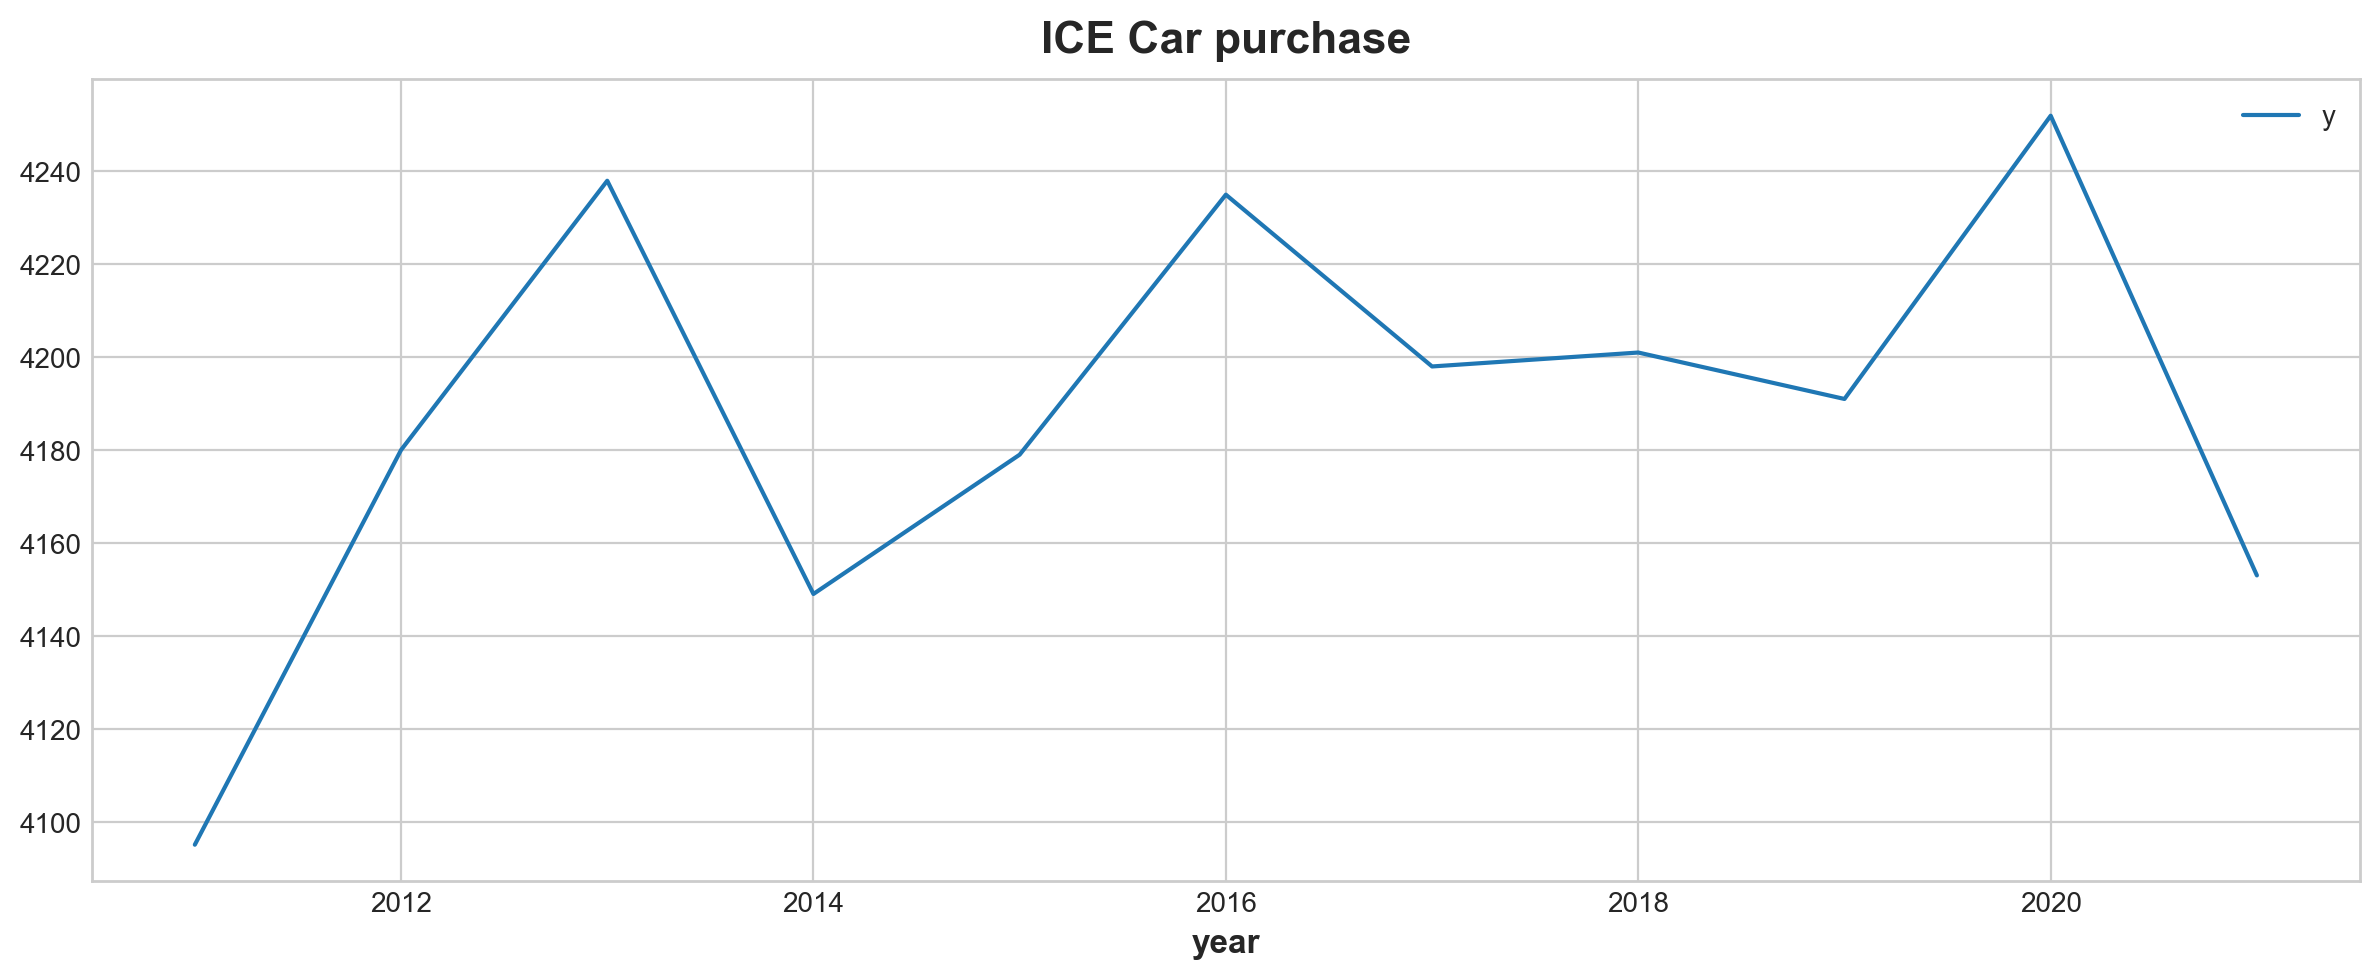

In [120]:
data.plot(title='ICE Car purchase')

In [123]:
ice = data.copy()

In [125]:
def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()

In [142]:
def split_data(df, test_split=0.25):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test

In [127]:
class Standardize:
    def __init__(self, split=0.15):
        self.split = split
    
    def _transform(self, df):
        return (df - self.mu)/self.sigma
    
    def split_data(self, df):
        n = int(len(df) * test_split)
        train, test = df[:-n], df[-n:]
        return train, test
    
    def fit_transform(self, train, test):
        self.mu = train.mean()
        self.sigma = train.std()
        train_s = self._transform(train)
        test_s =  self._transform(test)
        return train_s, test_s

    def transform(self, df):
        return self._transform(df)
    
    def inverse(self, df):
        return (df * self.sigma)+self.mu
        
    def inverse_y(self, df):
        return (df * self.sigma[0])+self.mu[0]

In [128]:
def train_model(train, test, regressor, reg_name):
    X_train, y_train  = train.drop(columns=['y']), train['y']
    X_test, y_test  = test.drop(columns=['y']), test['y']   

    print(f'training {reg_name} ...')
    
    regressor.fit(X_train, y_train) 
     
    yhat = regressor.predict(X_test)    
    rmse_test = np.sqrt(mse(y_test, yhat))
    mape_test = mape(y_test, yhat)
    mase_test = mase(y_test, yhat, y_train=y_train)    
    residuals = y_test.values - yhat     
    
    model_metadata = {
        'Model Name': reg_name, 'Model': regressor, 
        'RMSE': rmse_test, 'MAPE': mape_test, 'MASE': mase_test,
        'yhat': yhat, 'resid': residuals, 'actual': y_test.values}

    return model_metadata

In [129]:
def train_different_models(train, test, regressors):
    results = []
    for reg_name, regressor in regressors.items():
        results.append(train_model(train,
                                   test,
                                   regressor,
                                   reg_name))
    return results

In [130]:
from statsmodels.graphics.tsaplots import plot_acf
def plot_results(cols, results, data_name):
    for row in results[cols].iterrows():
        yhat, resid, actual, name = row[1]
        plt.title(f'{data_name} - {name}')
        plt.plot(actual, 'k--', alpha=0.5)
        plt.plot(yhat, 'k')
        plt.legend(['actual', 'forecast'])
        plot_acf(resid, zero=False, 
                 title=f'{data_name} - Autocorrelation')
        plt.show()

In [131]:
from sktime.performance_metrics.forecasting import(MeanAbsolutePercentageError, 
                                                   MeanSquaredError, 
                                                   MeanAbsoluteScaledError)

mse = MeanSquaredError()
mape = MeanAbsolutePercentageError()
mase = MeanAbsoluteScaledError()

In [132]:
ice.head()

,y
year,
2011,4095
2012,4180
2013,4238
2014,4149
2015,4179


In [135]:
ice.index.freq = 'Year'
print(ice.index.freq)

Year


<AxesSubplot: title={'center': 'ICE Car Purchase'}, xlabel='year'>

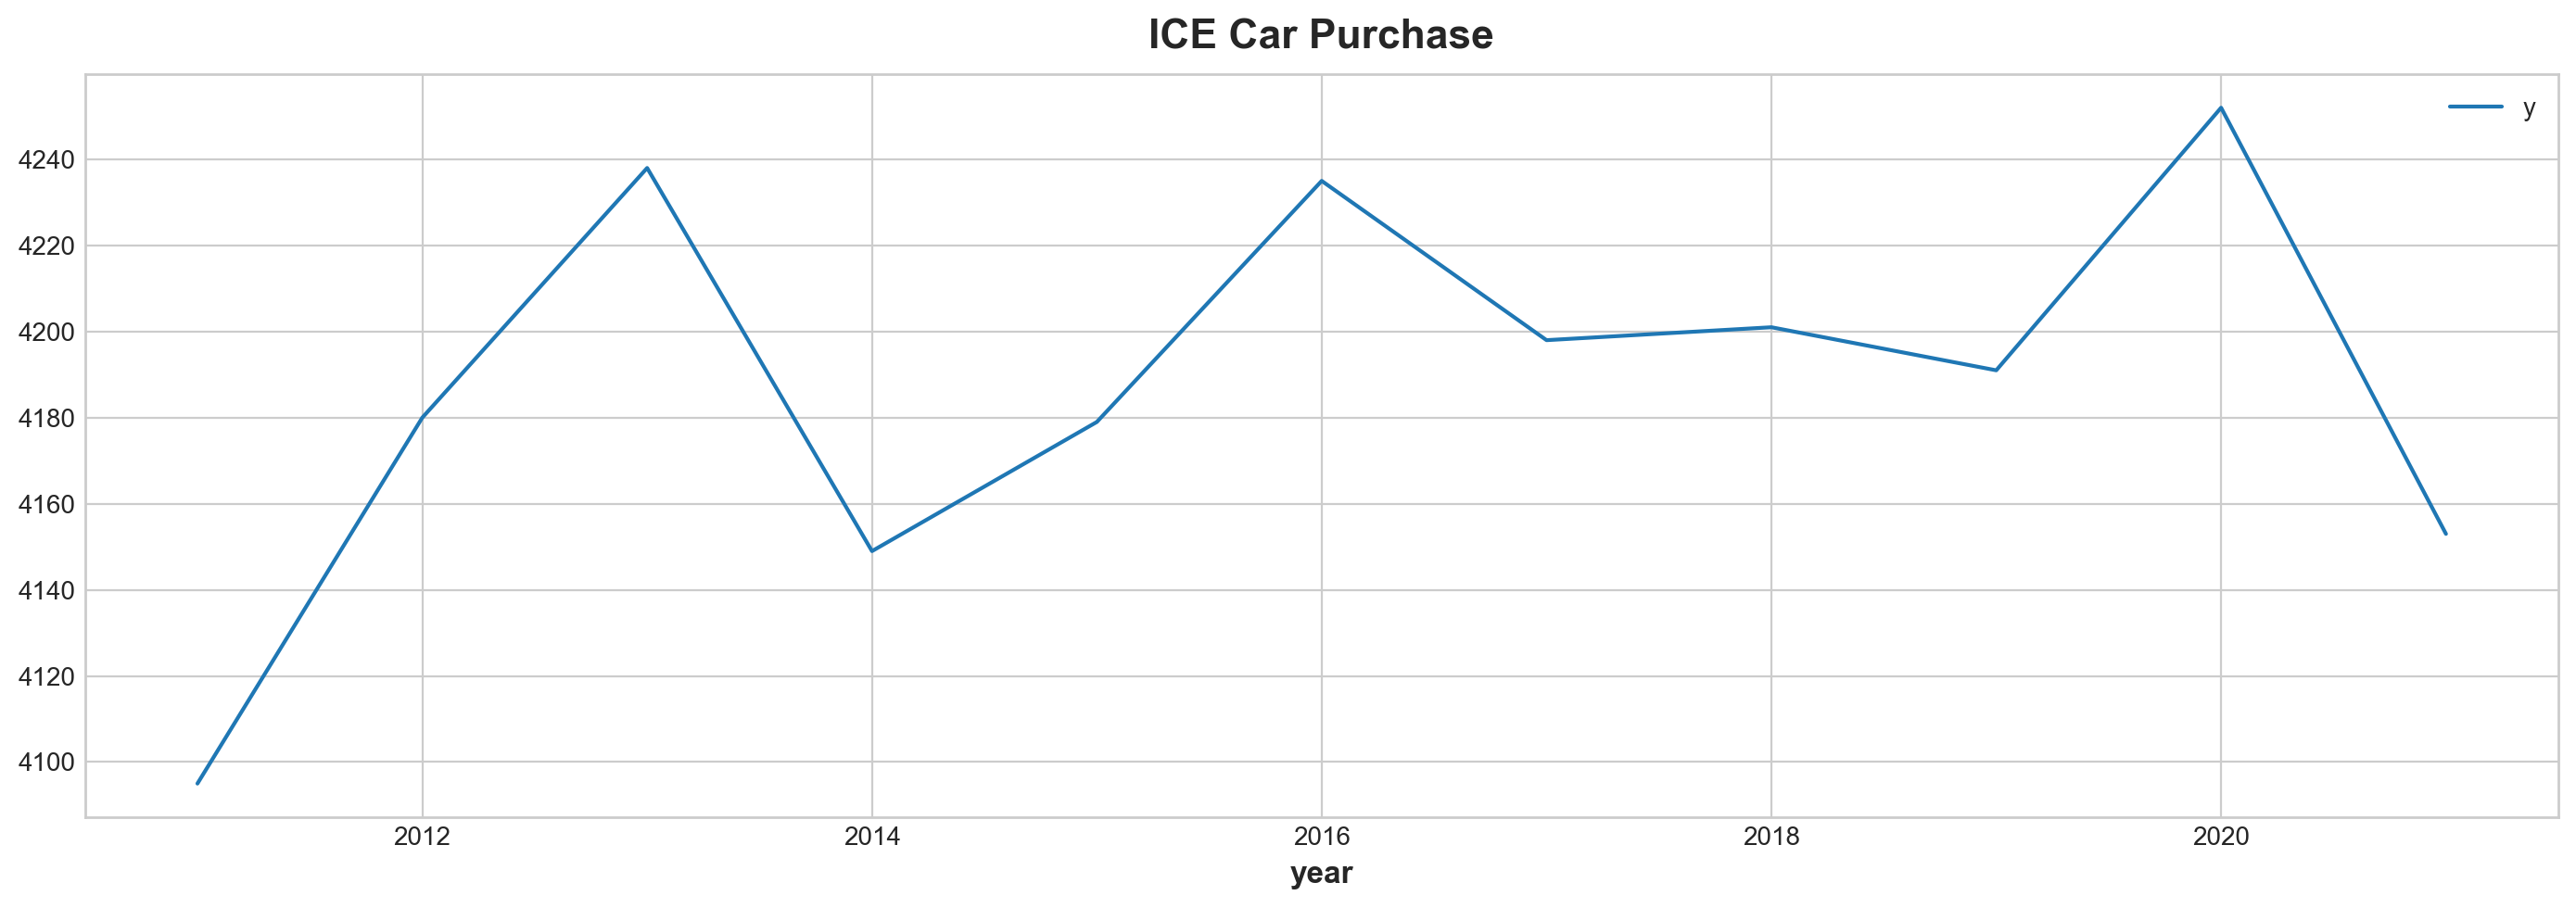

In [136]:
plt.rcParams["figure.figsize"] = [14, 5]  
ice.plot(title='ICE Car Purchase')


In [137]:
ice_os = one_step_forecast(ice, 3)
print(ice_os.shape)

(8, 4)


In [138]:
ice_os.head()

,x_1,x_2,x_3,y
year,,,,
2011,4095,4180,4238,4149
2012,4180,4238,4149,4179
2013,4238,4149,4179,4235
2014,4149,4179,4235,4198
2015,4179,4235,4198,4201


In [143]:
train, test = split_data(ice_os)
print(f'Train: {len(train)} Test: {len(test)}')

Train: 6 Test: 2


In [144]:
scaler = Standardize()
train_s, test_s = scaler.fit_transform(train, test)
train_s.head()

,x_1,x_2,x_3,y
year,,,,
2011,-1.562086,-0.474675,1.123887,-1.529074
2012,0.012349,1.193880,-1.508374,-0.466397
2013,1.086668,-1.366489,-0.621095,1.517266
2014,-0.561857,-0.503443,1.035159,0.206632
2015,-0.006174,1.107576,-0.059152,0.312899


In [145]:
y_train_original = scaler.inverse_y(train_s['y'])

In [146]:
train_original = scaler.inverse(train_s)
train_original.head()

,x_1,x_2,x_3,y
year,,,,
2011,4095.0,4180.0,4238.0,4149.0
2012,4180.0,4238.0,4149.0,4179.0
2013,4238.0,4149.0,4179.0,4235.0
2014,4149.0,4179.0,4235.0,4198.0
2015,4179.0,4235.0,4198.0,4201.0


In [147]:
from sklearn.linear_model import( LinearRegression, ElasticNet, Ridge, Lasso, HuberRegressor)

In [148]:
train_s.head()

,x_1,x_2,x_3,y
year,,,,
2011,-1.562086,-0.474675,1.123887,-1.529074
2012,0.012349,1.193880,-1.508374,-0.466397
2013,1.086668,-1.366489,-0.621095,1.517266
2014,-0.561857,-0.503443,1.035159,0.206632
2015,-0.006174,1.107576,-0.059152,0.312899


In [149]:
test_s.head()

,x_1,x_2,x_3,y
year,,,,
2017,0.345758,0.129457,-0.266184,2.119450
2018,0.401326,-0.158225,1.537950,-1.387384


In [150]:
regressors = {
    'Linear Regression': LinearRegression(fit_intercept=False),
    'Elastic Net': ElasticNet(0.5, fit_intercept=False),
    'Ridge Regression': Ridge(0.5, fit_intercept=False),
    'Lasso Regression': Lasso(0.5, fit_intercept=False),
    'Huber Regression': HuberRegressor(fit_intercept=False)}

In [151]:
ice_results = train_different_models(train_s, test_s, regressors)

training Linear Regression ...
training Elastic Net ...
training Ridge Regression ...
training Lasso Regression ...
training Huber Regression ...


In [152]:
cols = ['Model Name', 'RMSE', 'MAPE', 'MASE']
ice_results = pd.DataFrame(ice_results)
ice_results[cols].sort_values('MASE')

,Model Name,RMSE,MAPE,MASE
2,Ridge Regression,1.749553,1.016578,1.806925
3,Lasso Regression,1.783829,1.010985,1.824876
1,Elastic Net,1.778780,1.023194,1.830706
0,Linear Regression,1.788909,1.051100,1.853209
4,Huber Regression,1.883433,1.125011,1.954728


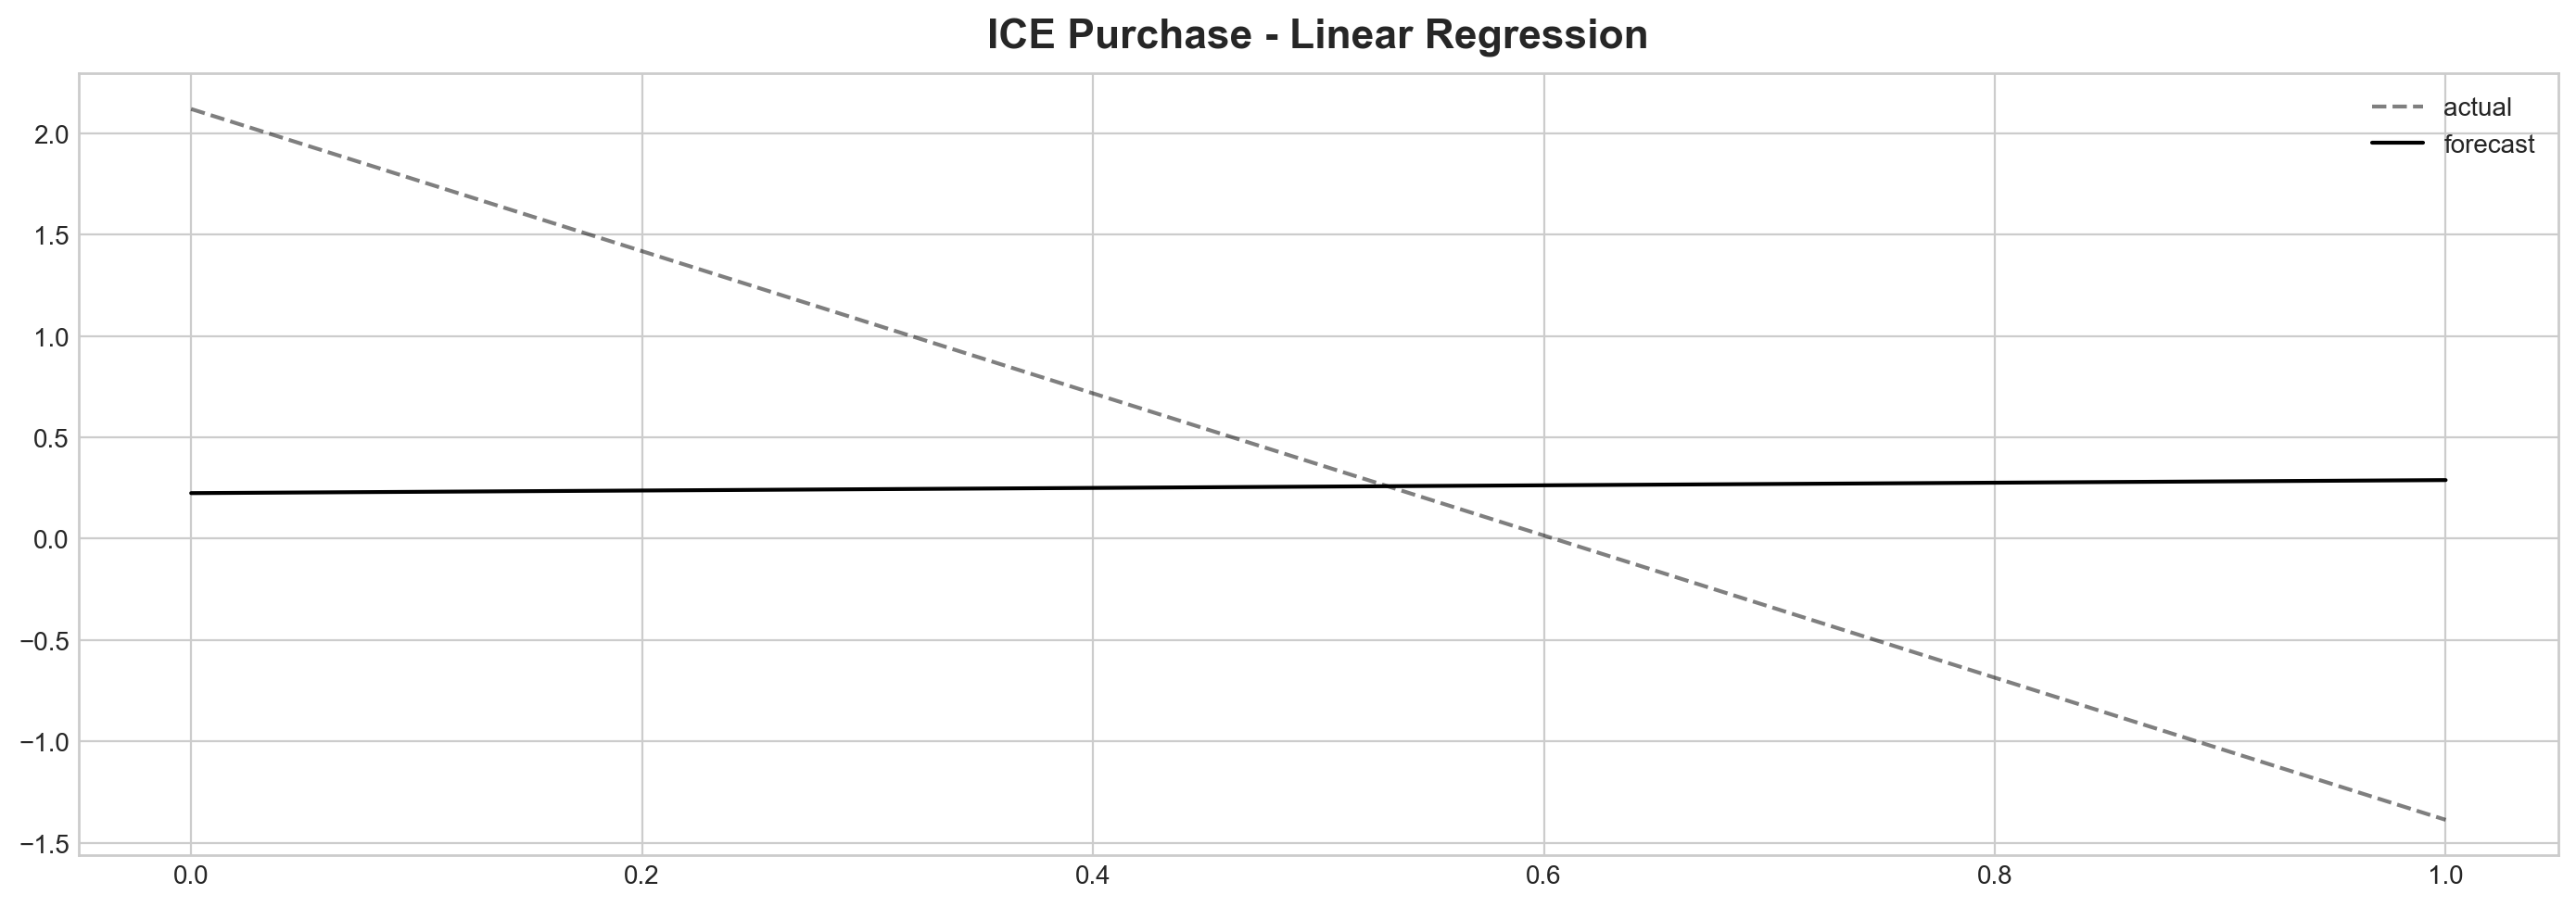

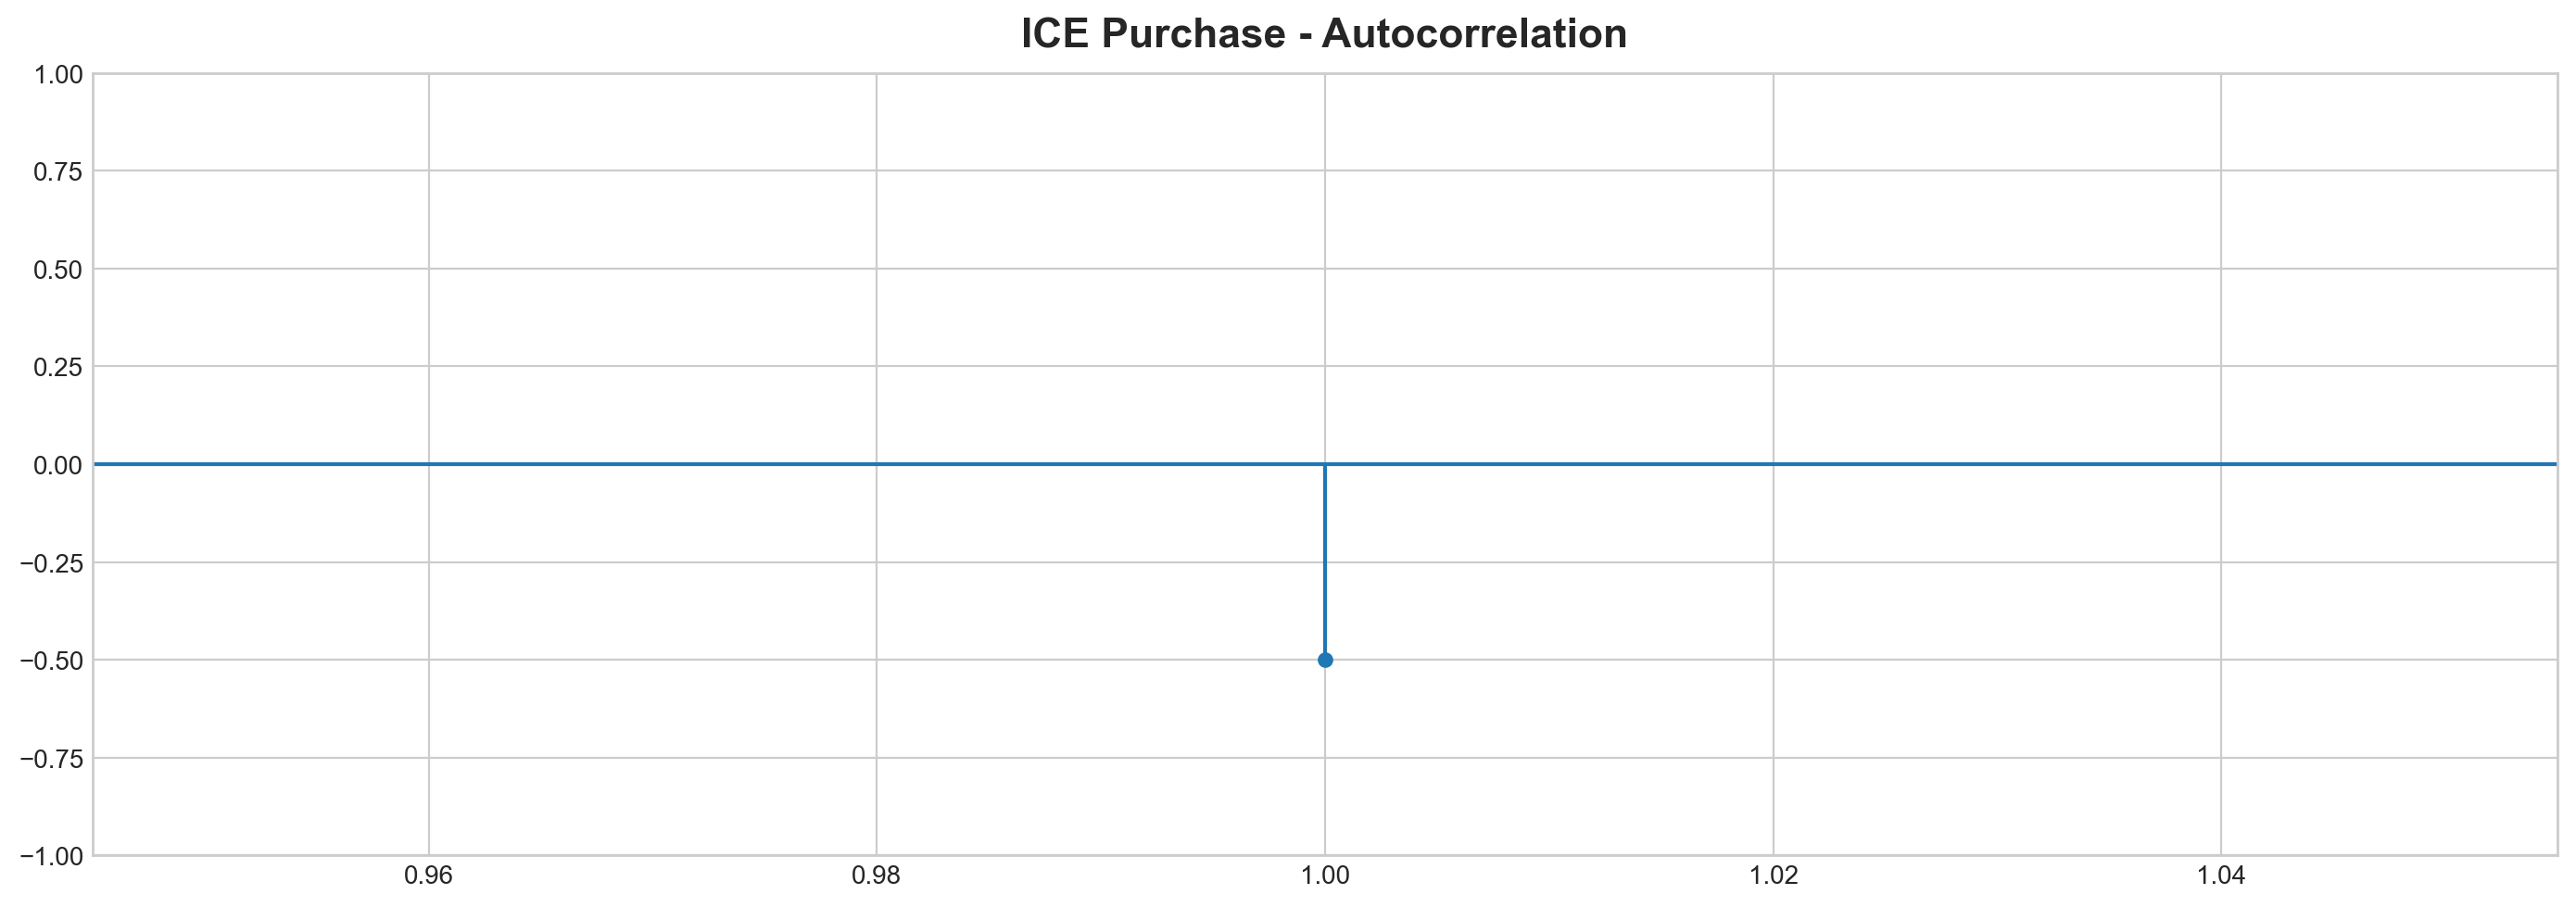

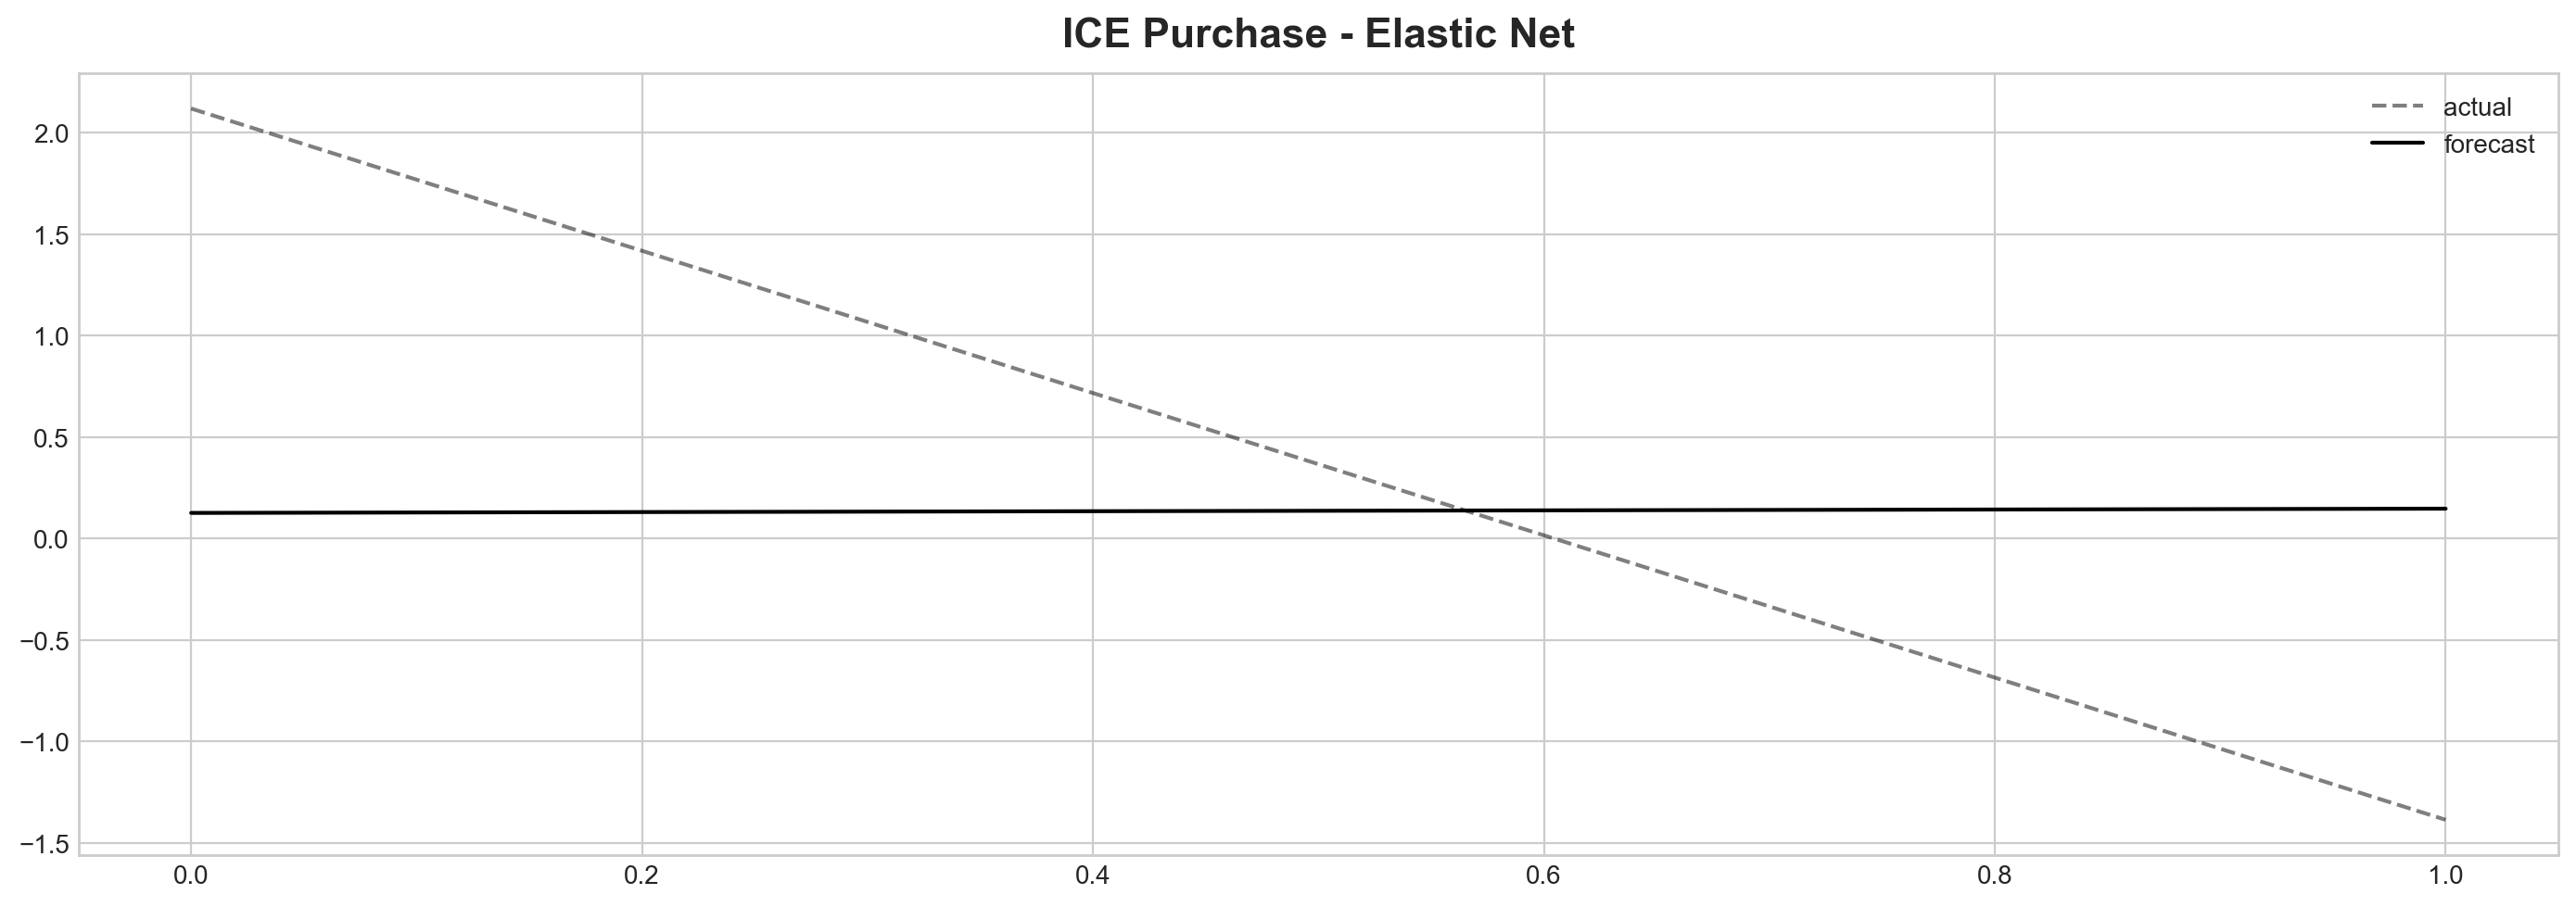

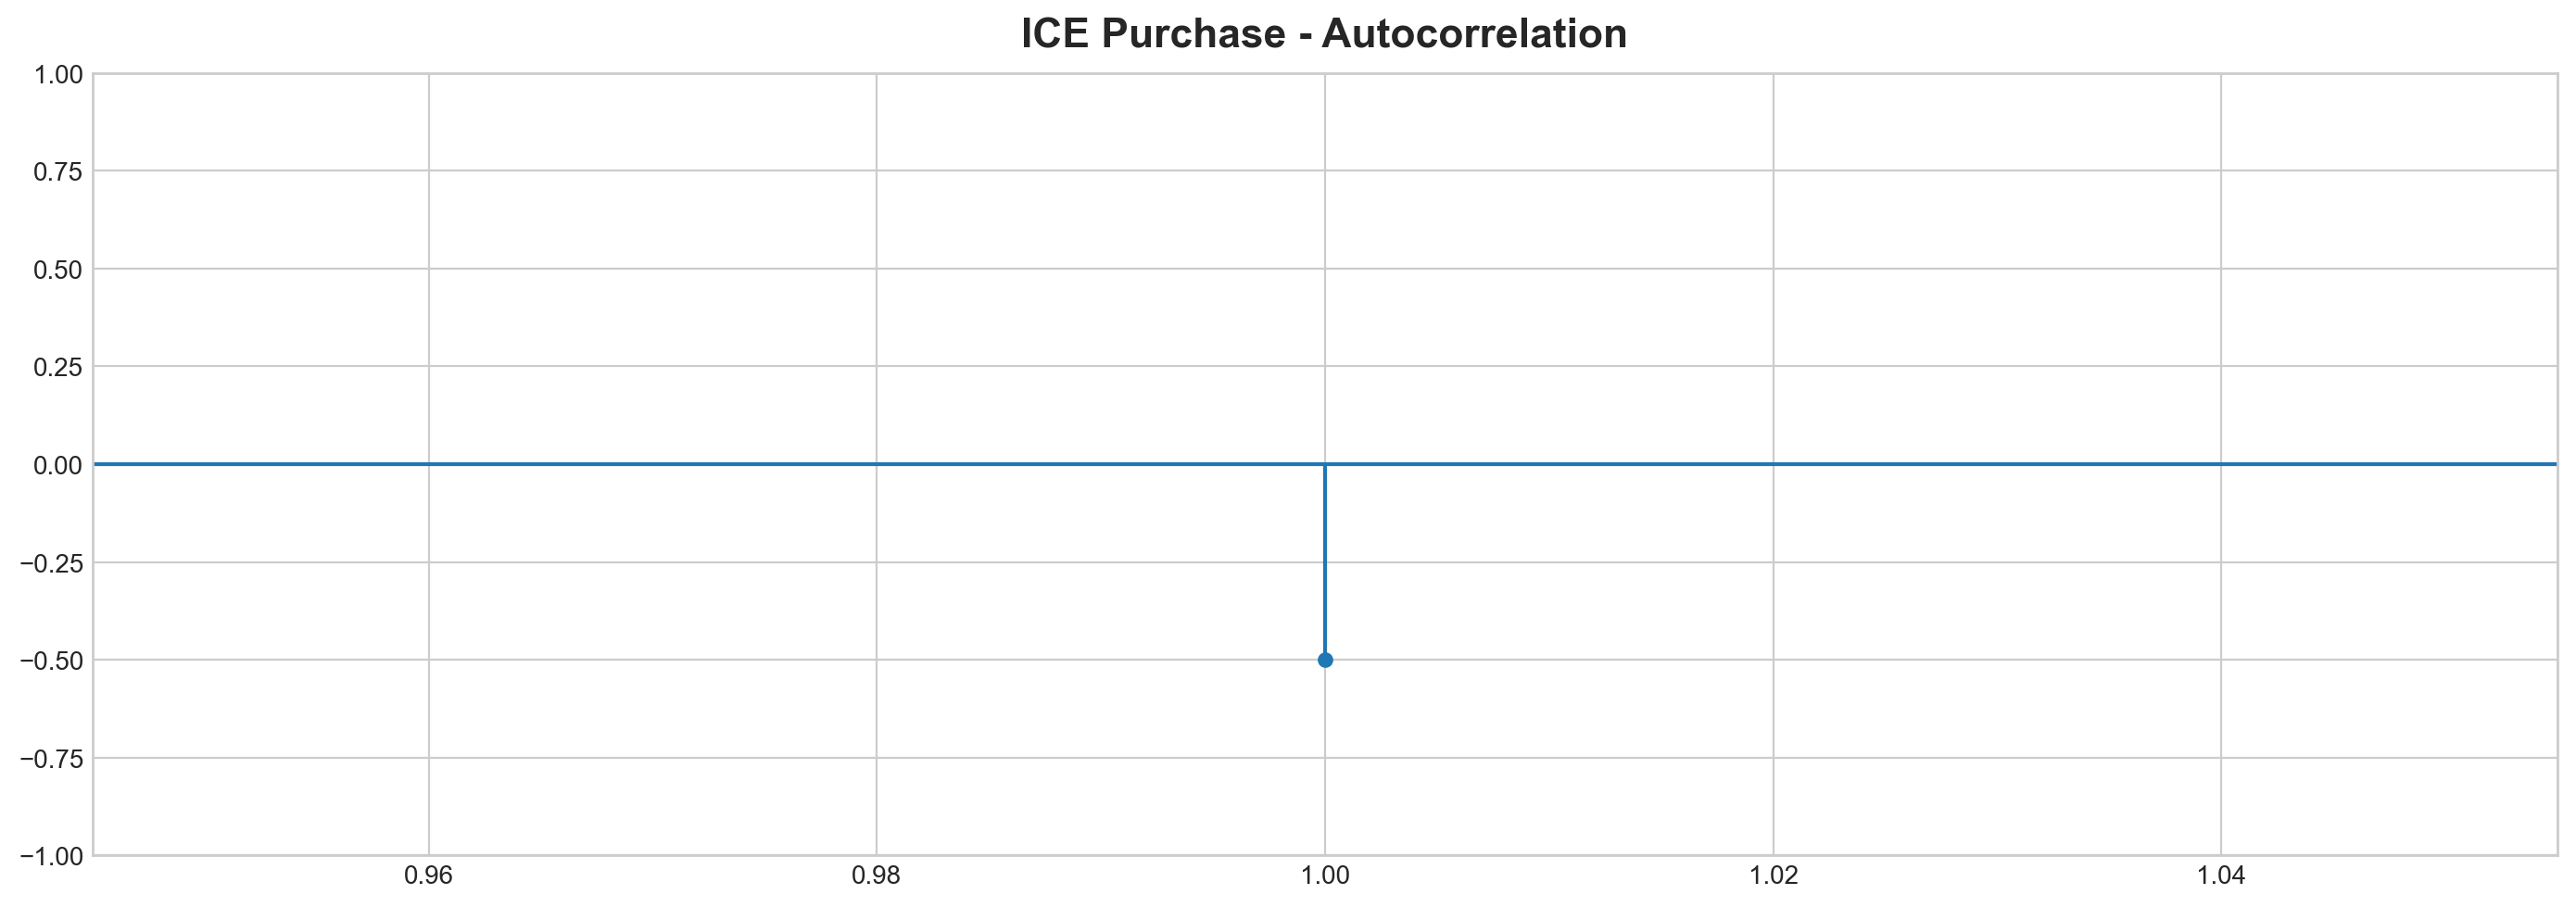

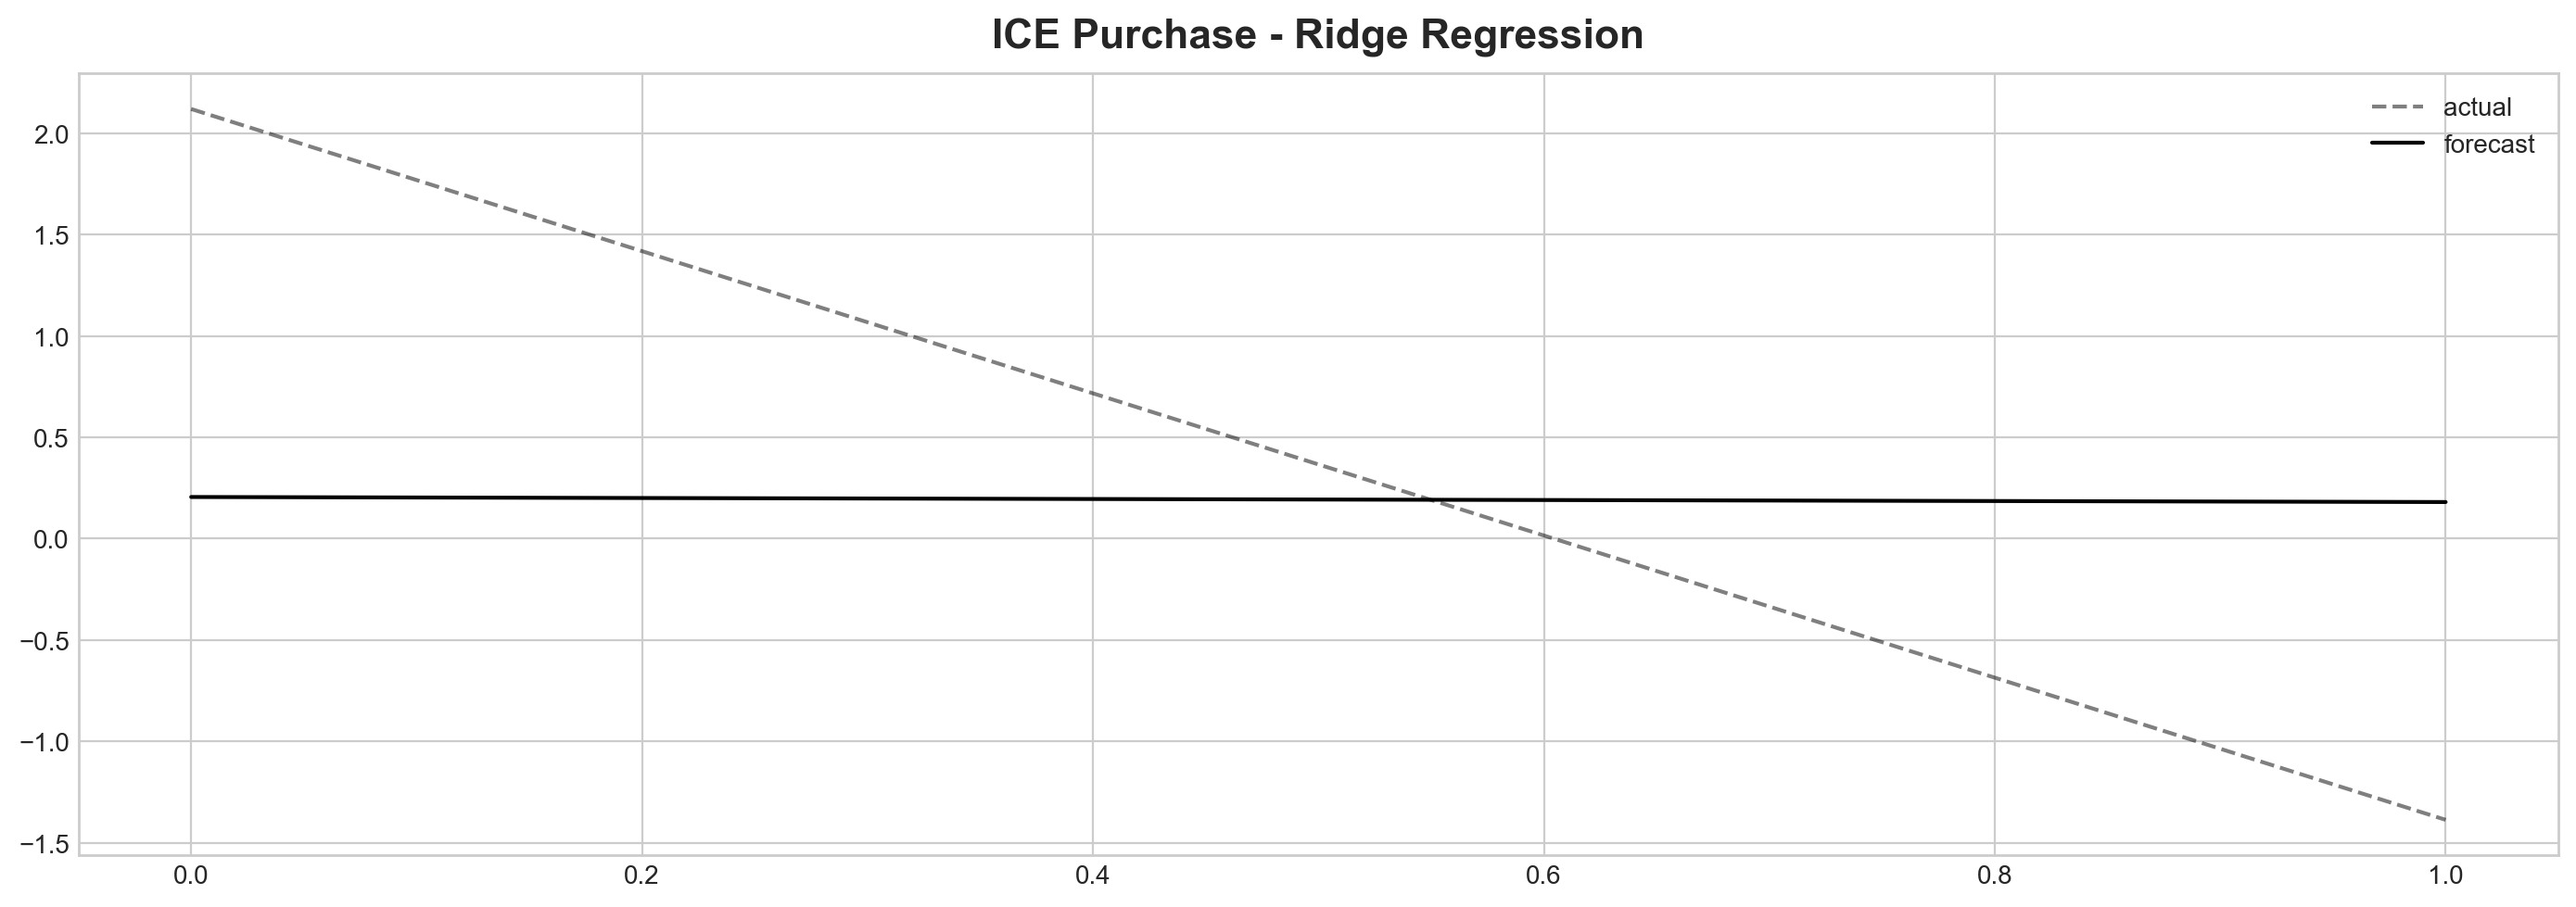

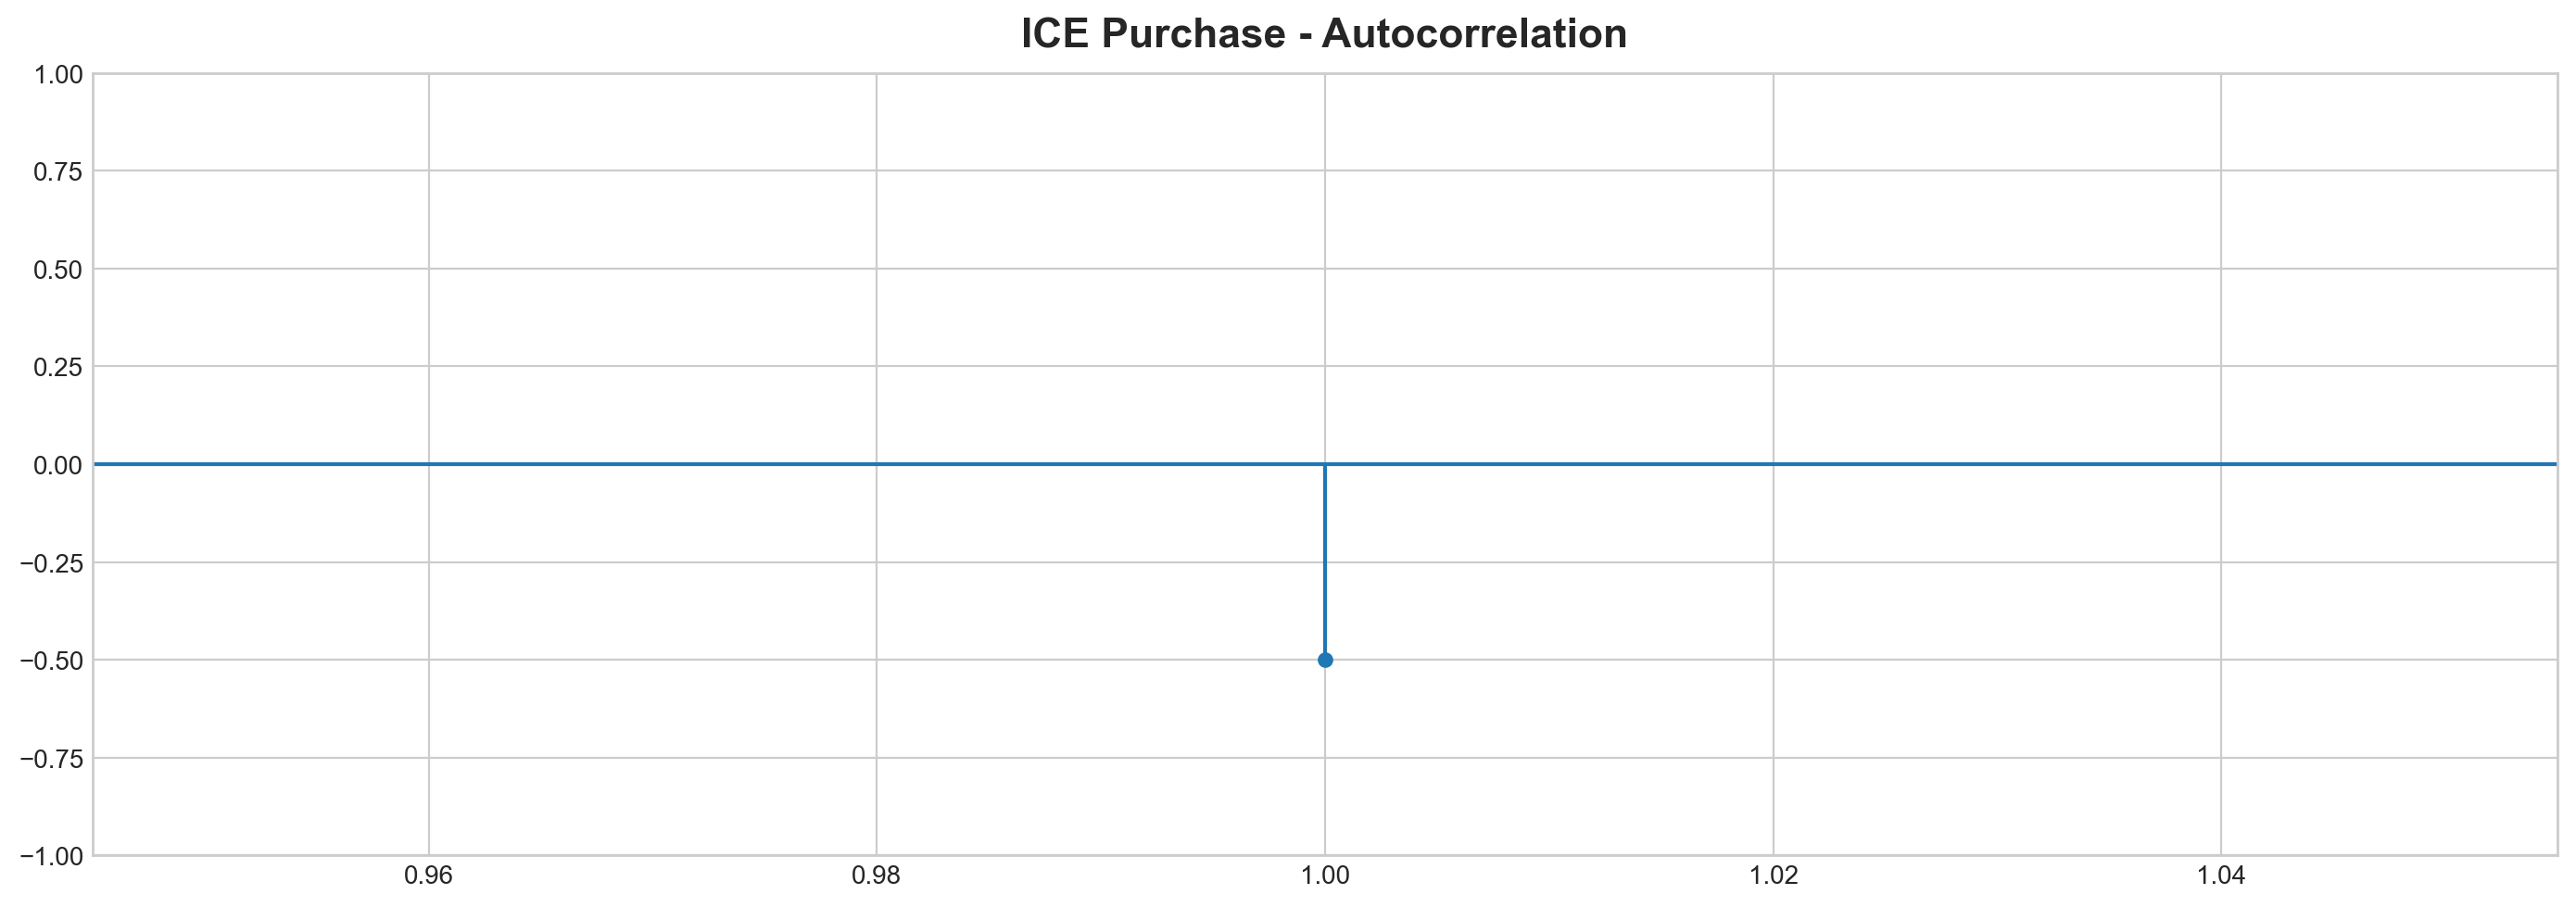

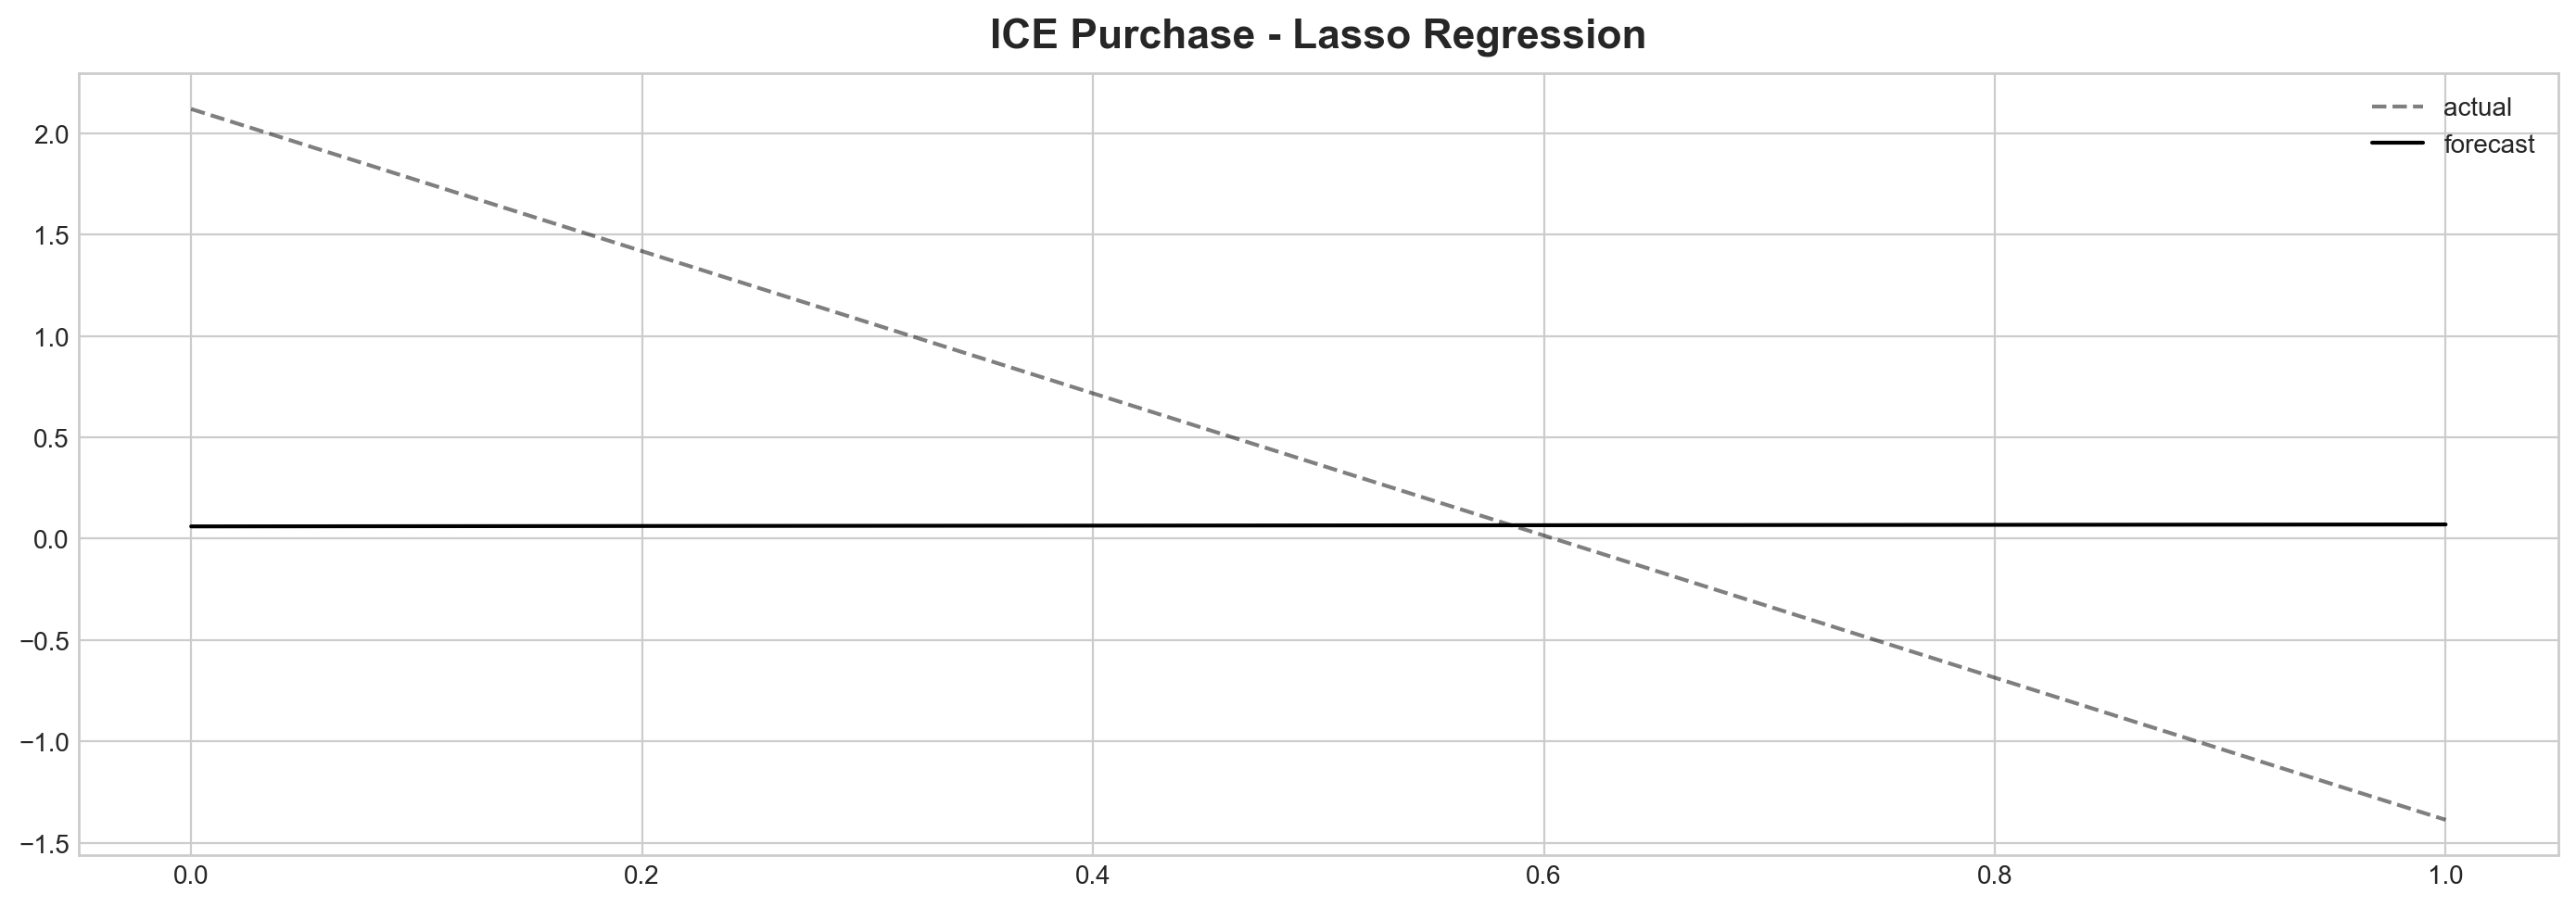

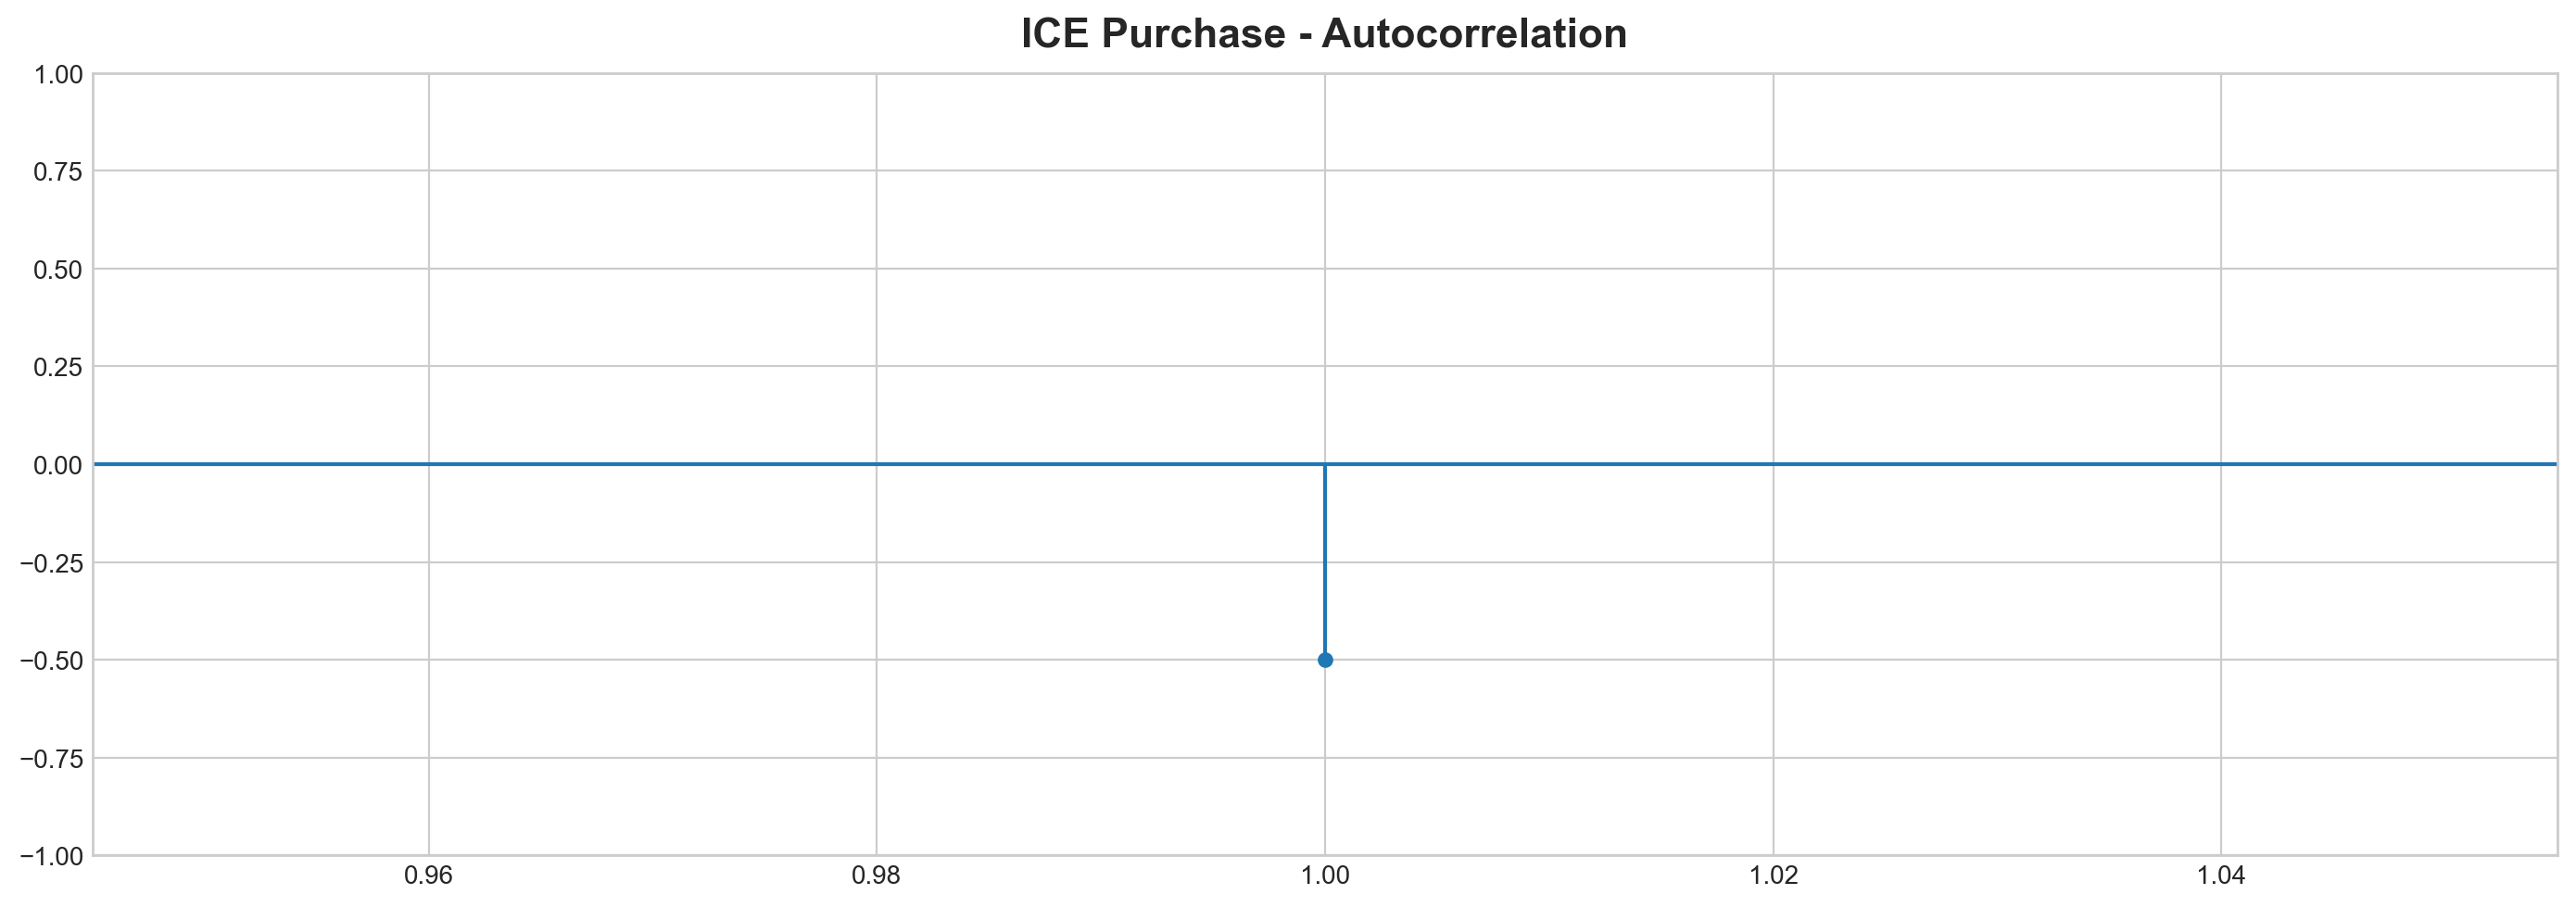

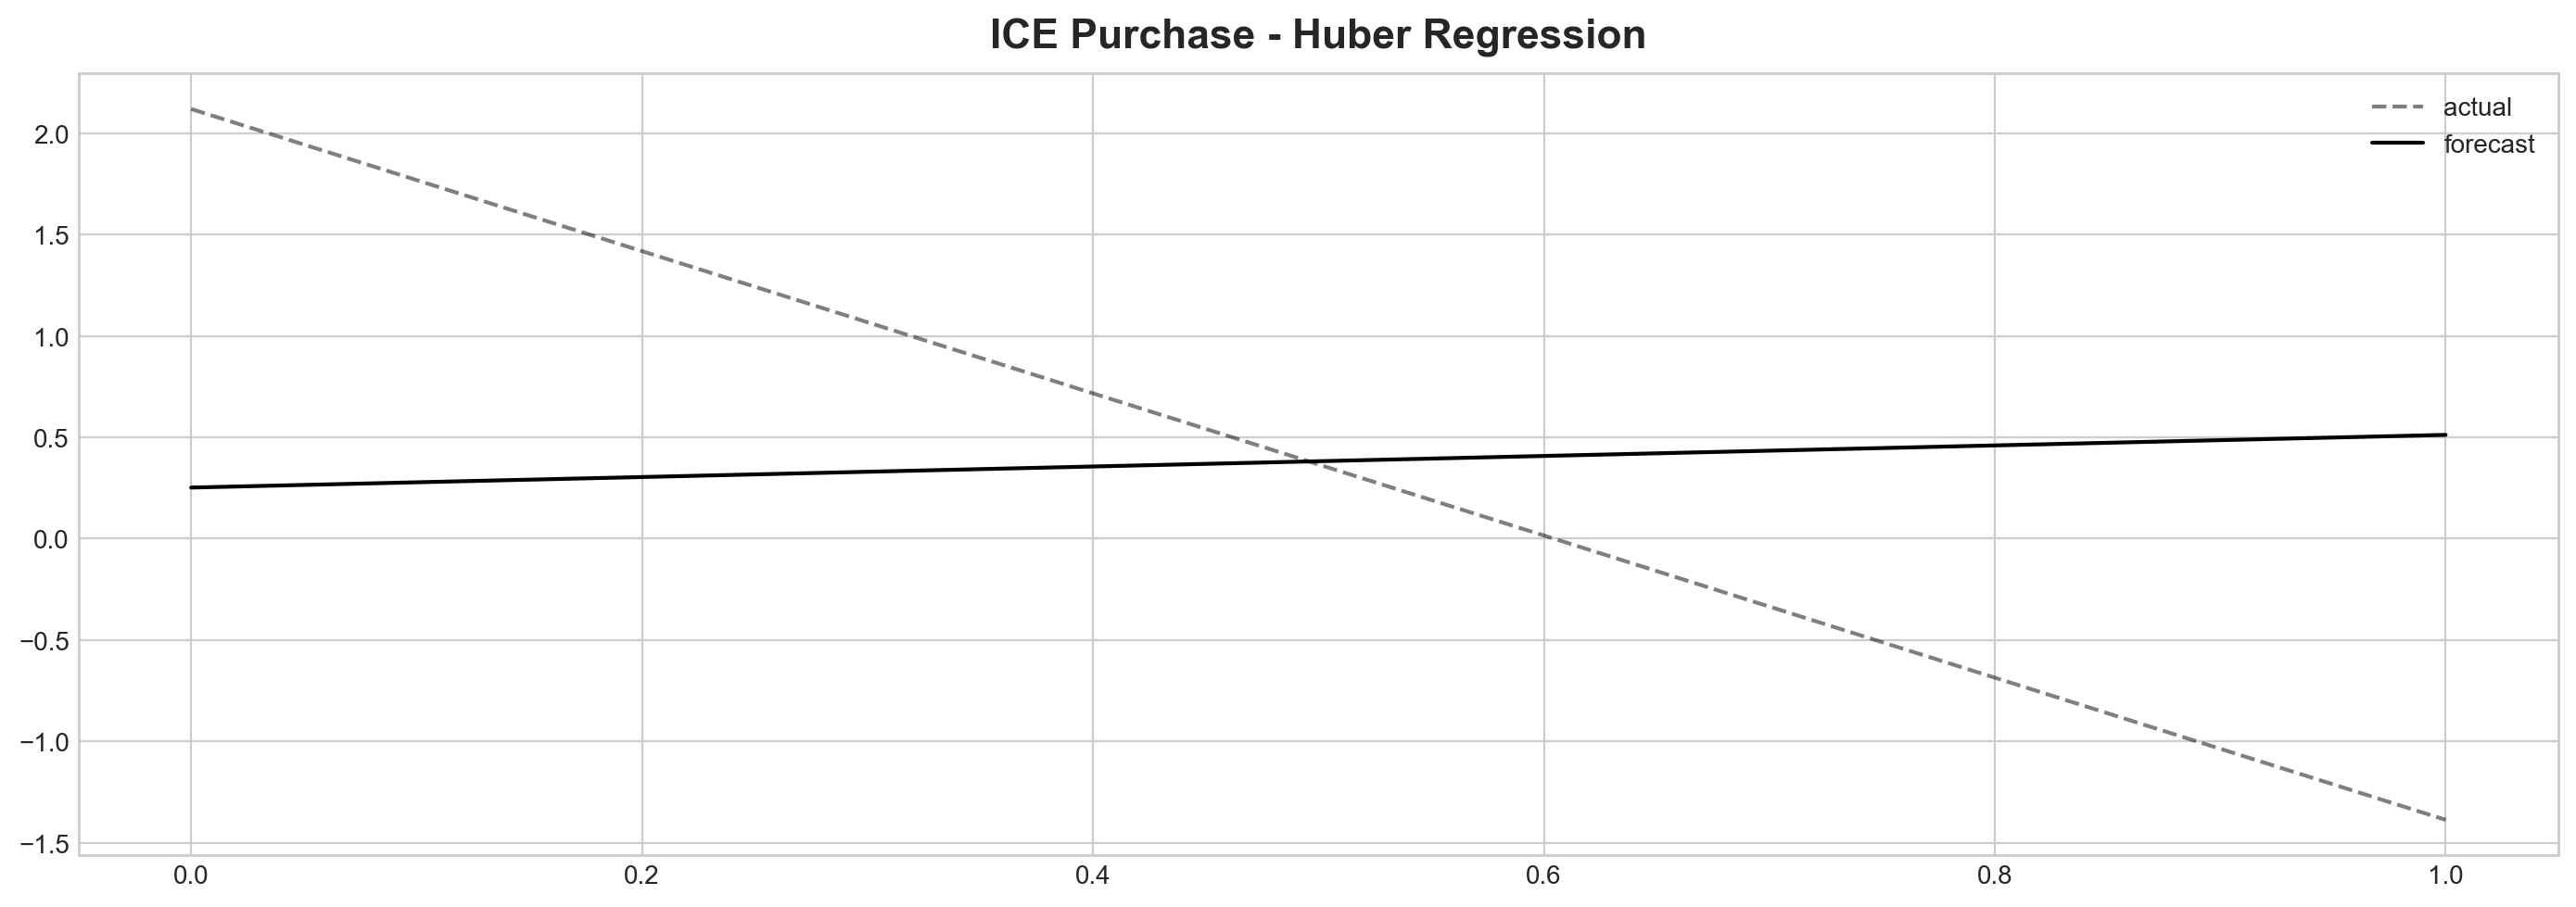

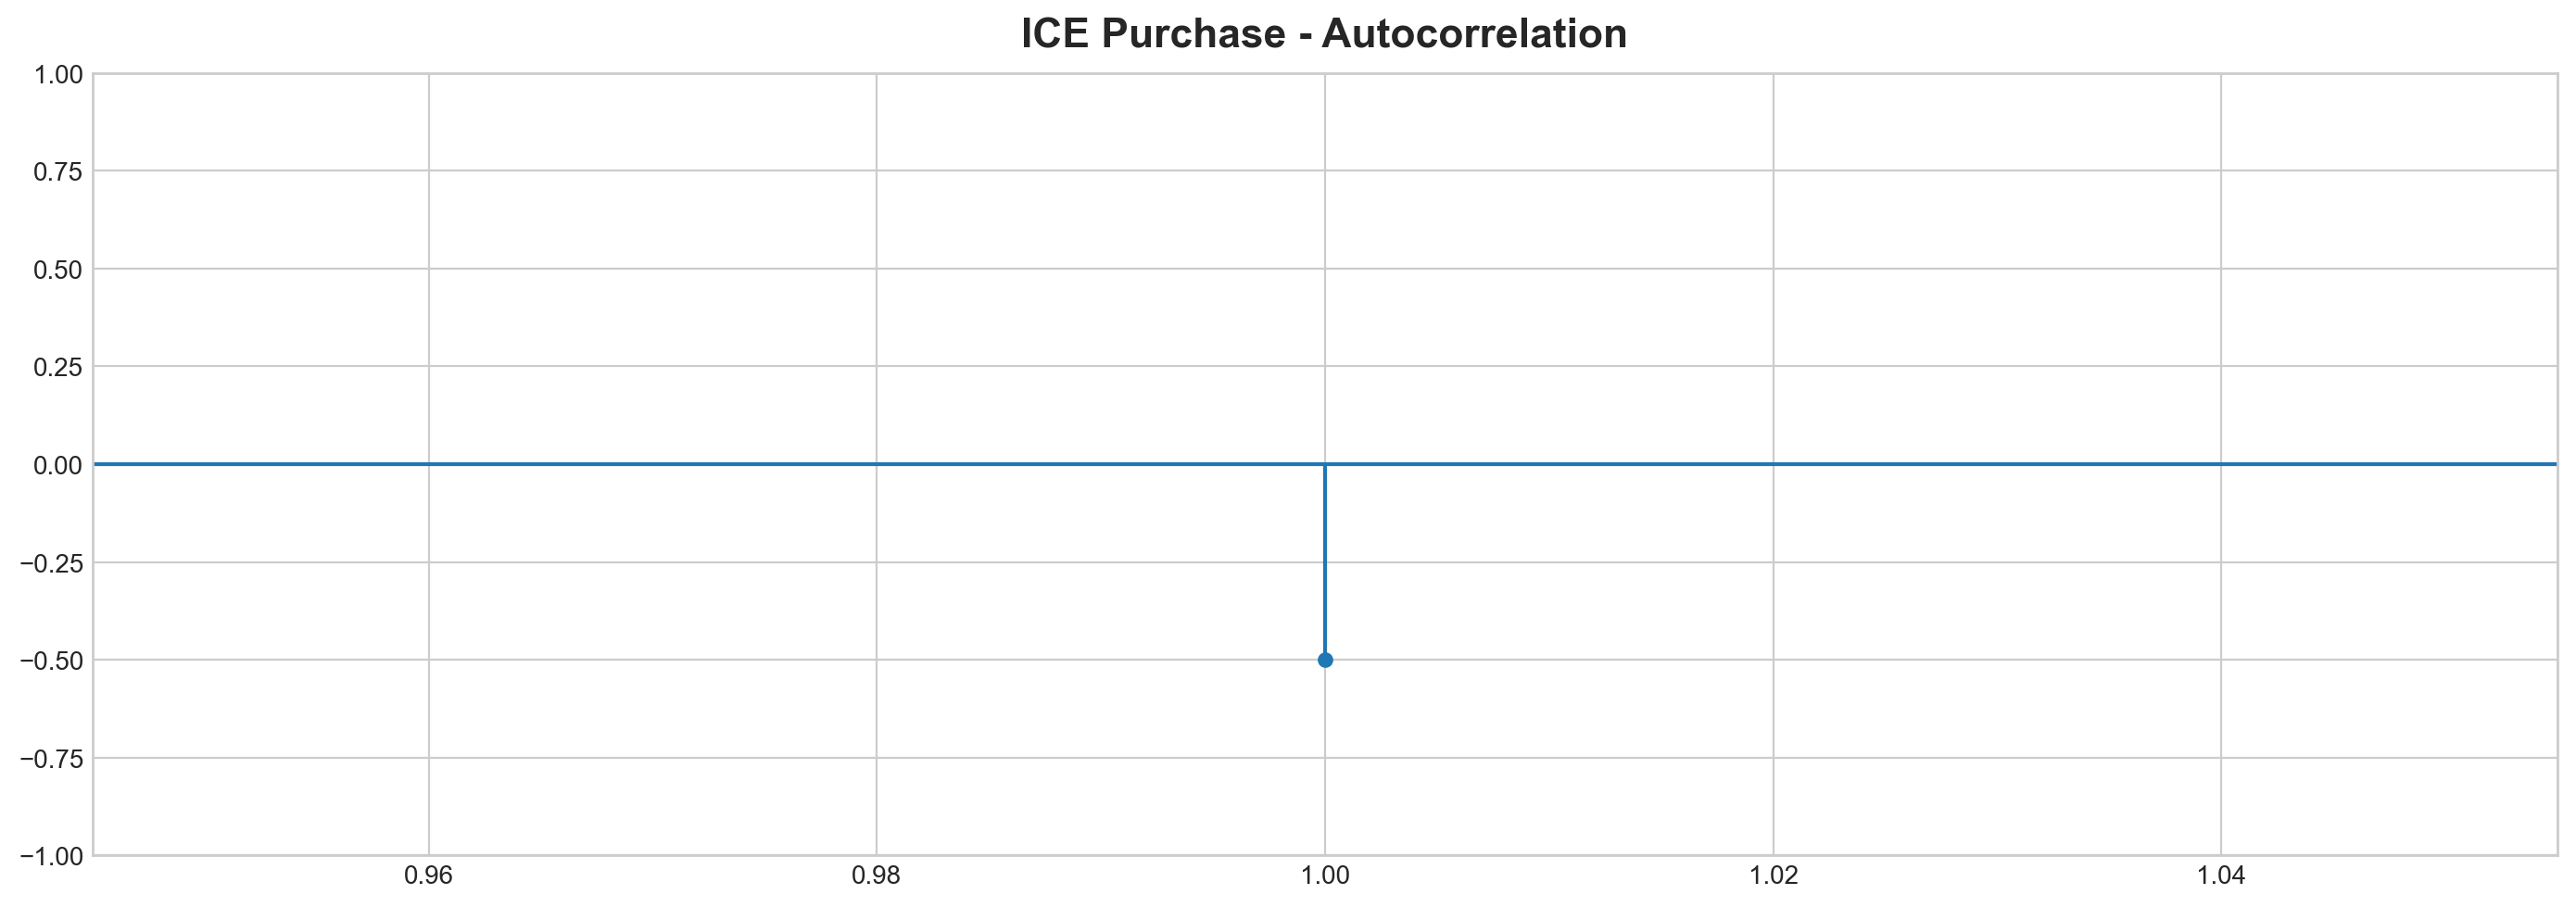

In [153]:
cols = ['yhat', 'resid', 'actual', 'Model Name']
plot_results(cols, ice_results, 'ICE Purchase')

In [154]:
cols = ['Model Name', 'Model']
en_models = ice_results.iloc[0:4][cols]

for row in en_models.iterrows():
    print(row[1][0])
    print(row[1][1].coef_)

Linear Regression
[ 0.7312432  -0.28651772 -0.03258213]
Elastic Net
[ 0.3646126  -0.00227105 -0.        ]
Ridge Regression
[ 0.63963216 -0.28471321 -0.07890877]
Lasso Regression
[ 0.17418178 -0.         -0.        ]


In [155]:
def multi_step_forecast(data, model, steps=3):
    forecast = []
    for i in range(steps):
        one_step_pred = model.predict(np.array(data).reshape(1,-1))[0]
        forecast.append(one_step_pred)
        _ = data.pop(0)
        data.append(one_step_pred)
    return np.array(forecast)

In [159]:
ice_results = pd.DataFrame(ice_results)

In [160]:
ice_results

,Model Name,Model,RMSE,MAPE,MASE,yhat,resid,actual
0,Linear Regression,LinearRegression(fit_intercept=False),1.788909,1.051100,1.853209,"[0.2244143790416683, 0.28869173944912163]","[1.8950353475323112, -1.6760752652009088]","[2.1194497265739796, -1.3873835257517872]"
1,Elastic Net,"ElasticNet(alpha=0.5, fit_intercept=False)",1.778780,1.023194,1.830706,"[0.1257737456866888, 0.1466879754473537]","[1.9936759808872908, -1.534071501199141]","[2.1194497265739796, -1.3873835257517872]"
2,Ridge Regression,"Ridge(alpha=0.5, fit_intercept=False)",1.749553,1.016578,1.806925,"[0.20530412535286952, 0.1803922476469381]","[1.91414560122111, -1.5677757733987254]","[2.1194497265739796, -1.3873835257517872]"
3,Lasso Regression,"Lasso(alpha=0.5, fit_intercept=False)",1.783829,1.010985,1.824876,"[0.060224754981607814, 0.06990373346079463]","[2.059224971592372, -1.4572872592125818]","[2.1194497265739796, -1.3873835257517872]"
4,Huber Regression,HuberRegressor(fit_intercept=False),1.883433,1.125011,1.954728,"[0.25180594807686674, 0.5117081339841804]","[1.8676437784971127, -1.8990916597359675]","[2.1194497265739796, -1.3873835257517872]"


In [162]:
test_ice.iloc[[-1]]

,ds,y
10,2021,4020


In [163]:
models = ice_results[['Model Name','Model']]
models

,Model Name,Model
0,Linear Regression,LinearRegression(fit_intercept=False)
1,Elastic Net,"ElasticNet(alpha=0.5, fit_intercept=False)"
2,Ridge Regression,"Ridge(alpha=0.5, fit_intercept=False)"
3,Lasso Regression,"Lasso(alpha=0.5, fit_intercept=False)"
4,Huber Regression,HuberRegressor(fit_intercept=False)


In [ ]:
def multi_step_forecast(data, model, steps=3):
    forecast = []
    for i in range(steps):
        one_step_pred = model.predict(np.array(data).reshape(1,-1))[0]
        forecast.append(one_step_pred)
        _ = data.pop(0)
        data.append(one_step_pred)
    return np.array(forecast)

Non-Linear

In [168]:
from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor, 
                              ExtraTreesRegressor)


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.all import (
        Deseasonalizer, Detrender, 
        temporal_train_test_split,
        mean_absolute_percentage_error as mape, 
        mean_squared_percentage_error as mspe,
        mean_squared_error as mse, 
        ForecastingHorizon, 
        NaiveForecaster,
        TransformedTargetForecaster,
        PolynomialTrendForecaster
)
from sktime.forecasting.compose import make_reduction

In [169]:
ice.head()

,y
year,
2011,4095
2012,4180
2013,4238
2014,4149
2015,4179


In [170]:
train, test = split_data(ice)

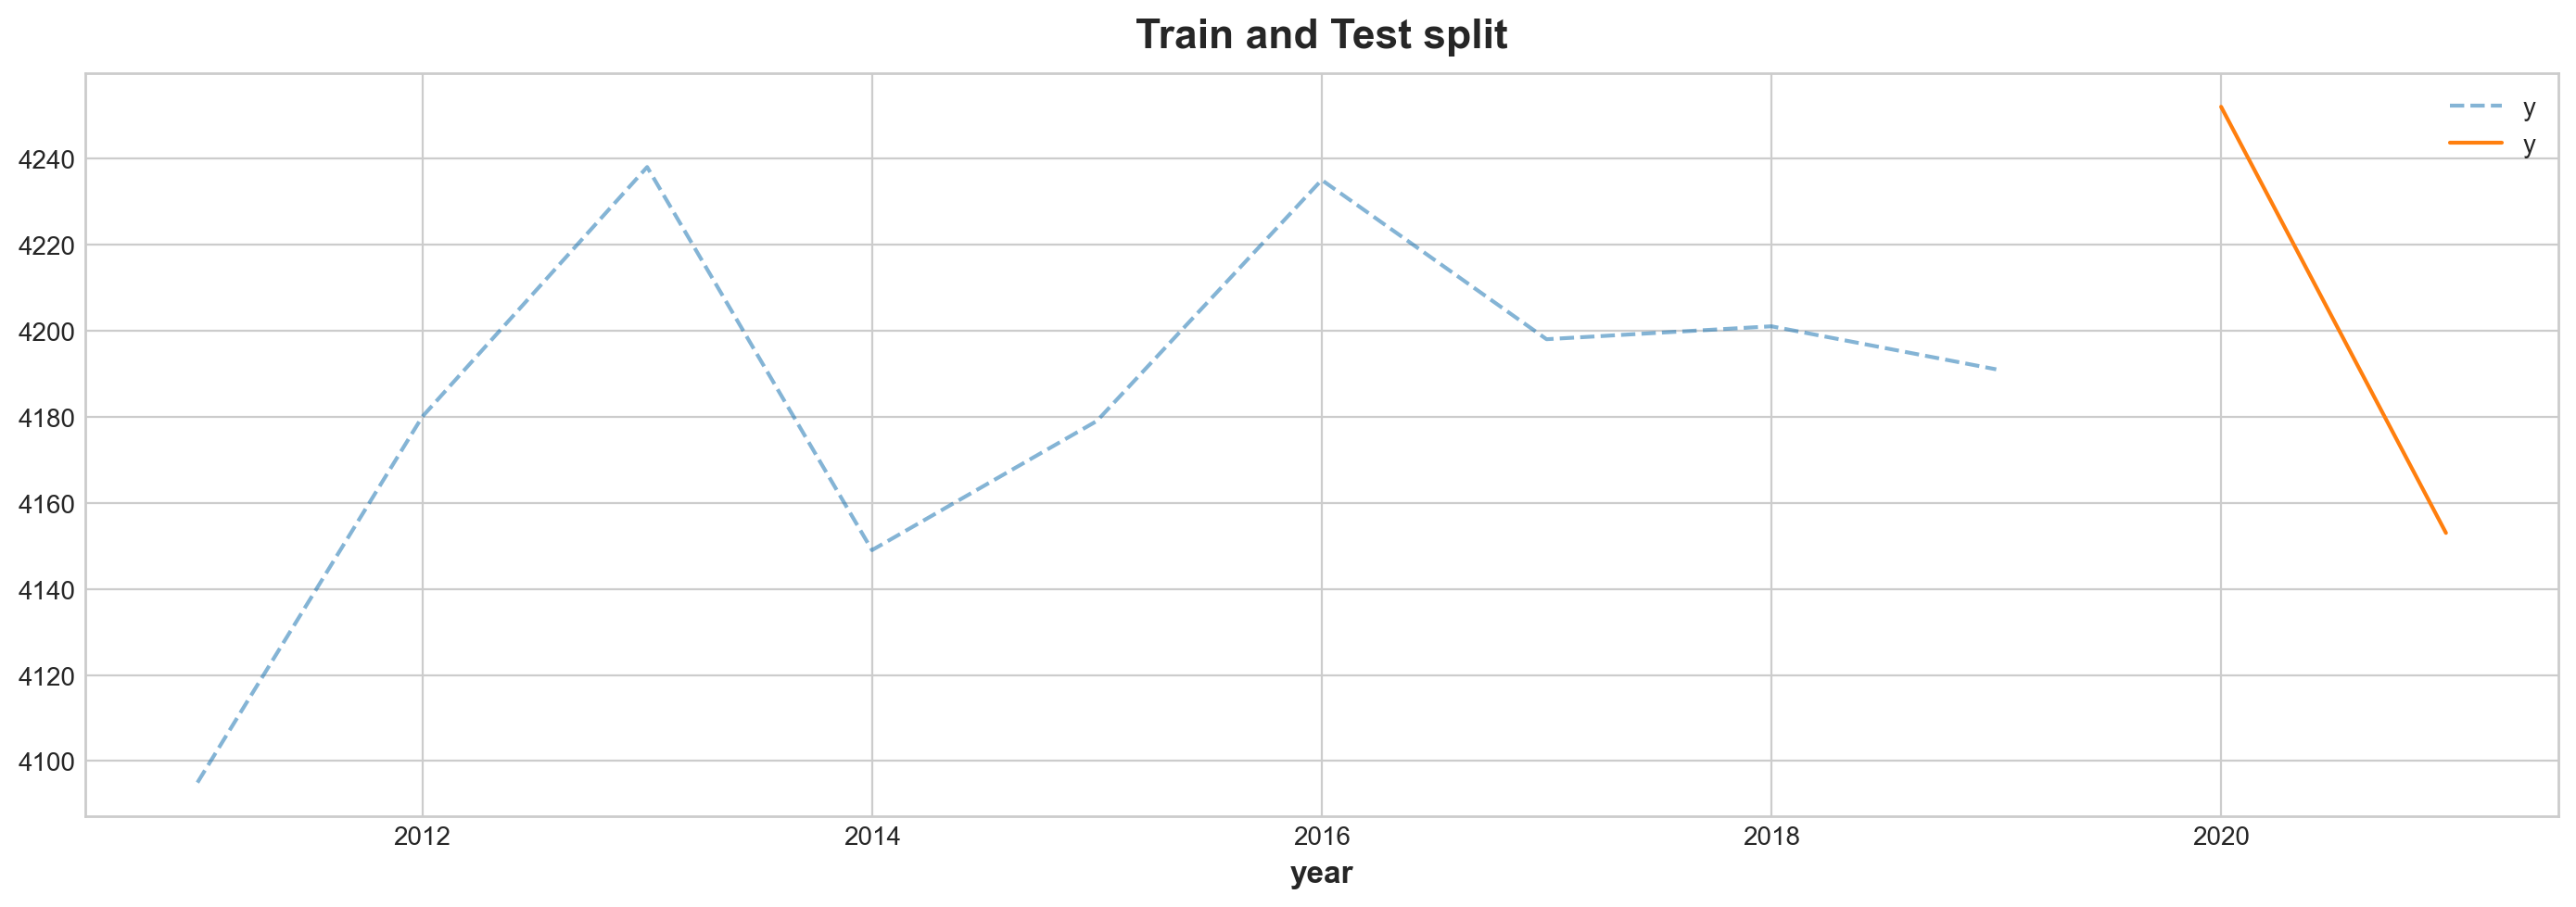

In [171]:
ax = train.plot(style='--', alpha=0.55)
test.plot(ax=ax)
plt.title('Train and Test split')
plt.show()

In [172]:
def make_forecast(data, n, regressor, window=12):
    fh = ForecastingHorizon(np.arange(n) + 1, is_relative=True)
    forecaster = [
            ("deseasonalize", Deseasonalizer(sp=12, model="additive")),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1)))]
    if not isinstance(regressor, NaiveForecaster):
        reg = ("forecaster", make_reduction(
            regressor,
            strategy='recursive',
            window_length=window,
            scitype='tabular-regressor'))
        forecaster.append(reg)
        model = TransformedTargetForecaster(forecaster).fit(data.values)
        
    else:
        model = regressor.fit(data.values)
    
    predicted = pd.Series(
            model.predict(fh=fh).reshape(-1),
            index= test.index
                    )
    return predicted

In [173]:
lr = LinearRegression()

In [174]:
make_reduction(lr)

RecursiveTabularRegressionForecaster(estimator=LinearRegression())

In [175]:
regressors = {
            'Naive Forecaster' : NaiveForecaster(strategy='mean', sp=12),
            'Linear Regression': LinearRegression(),
            'K-NN Regressor': KNeighborsRegressor(n_neighbors=5),
            'Extra Tree Regressor': ExtraTreesRegressor(),
            'Random Forest Regressor': RandomForestRegressor(),
            'Gradient Boosting Regressor': GradientBoostingRegressor()
            }

for k, reg in regressors.items():
    print(f'training {reg} ...')
    test[k] = make_forecast(train, len(test), regressor=reg , window=3)

ValueError: x must have 2 complete cycles requires 24 observations. x only has 9 observation(s)

AUTO_ARIMA

In [176]:
from pmdarima import auto_arima
n = len(test)
fh = ForecastingHorizon(np.arange(n) + 1)
arima = auto_arima(y=train, seasonal=False, m=2, suppress_warnings=True)

In [177]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:                        SARIMAX   Log Likelihood                 -46.222
Date:                Mon, 30 Jan 2023   AIC                             96.443
Time:                        22:33:42   BIC                             96.838
Sample:                             0   HQIC                            95.592
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4185.1111     16.318    256.465      0.000    4153.128    4217.095
sigma2      1691.8765    910.627      1.858      0.063     -92.919    3476.673
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.84   Prob(JB):                         0.62
Heteroskedasticity (H):               0.04   Skew:                            -0.80
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
test['ARIMA'] = arima.predict(n)

In [18]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last", sp=1)

In [19]:
forecaster.fit(ice["count"])

NaiveForecaster()

In [20]:
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='count'>)

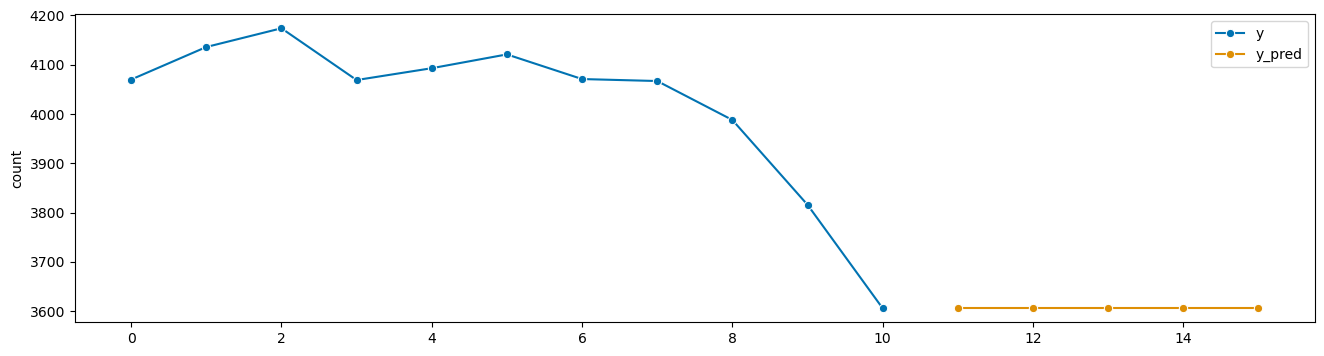

In [21]:
# plotting predictions and past data
plot_series(ice["count"], y_pred, labels=["y", "y_pred"])

In [25]:
from sktime.forecasting.arima import ARIMA
forecaster1 = ARIMA(order = (1,1,1),suppress_warnings=True)

In [26]:
forecaster1.fit(ice["count"])

ARIMA(order=(1, 1, 1), suppress_warnings=True)

In [27]:
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='count'>)

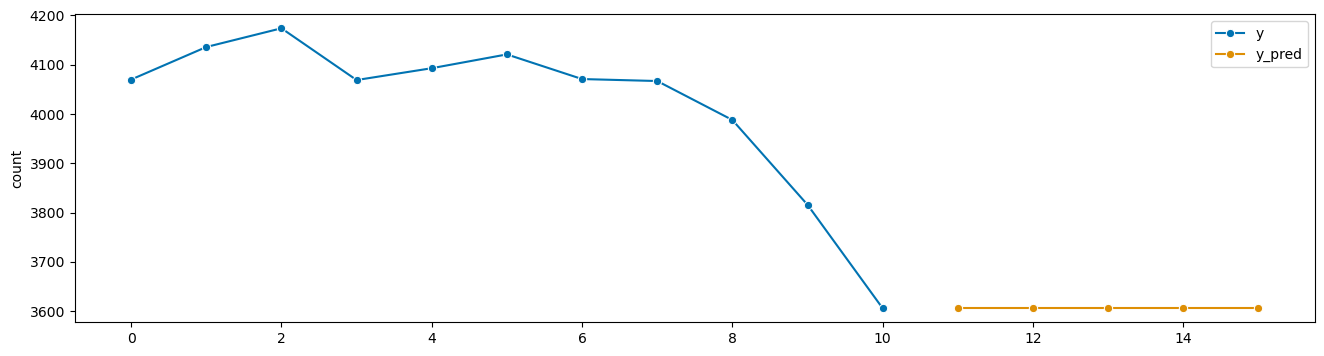

In [28]:
# plotting predictions and past data
plot_series(ice["count"], y_pred, labels=["y", "y_pred"])

In [24]:
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_,y = load_longley()
y

,GNPDEFL,GNP,UNEMP,ARMED,POP
Period,,,,,
1947,83.0,234289.0,2356.0,1590.0,107608.0
1948,88.5,259426.0,2325.0,1456.0,108632.0
1949,88.2,258054.0,3682.0,1616.0,109773.0
1950,89.5,284599.0,3351.0,1650.0,110929.0
1951,96.2,328975.0,2099.0,3099.0,112075.0
1952,98.1,346999.0,1932.0,3594.0,113270.0
1953,99.0,365385.0,1870.0,3547.0,115094.0
1954,100.0,363112.0,3578.0,3350.0,116219.0
1955,101.2,397469.0,2904.0,3048.0,117388.0


In [23]:
X = pd.DataFrame(index=y.index)
X

""
Period
1949-01
1949-02
1949-03
1949-04
1949-05
...
1960-08
1960-09
1960-10


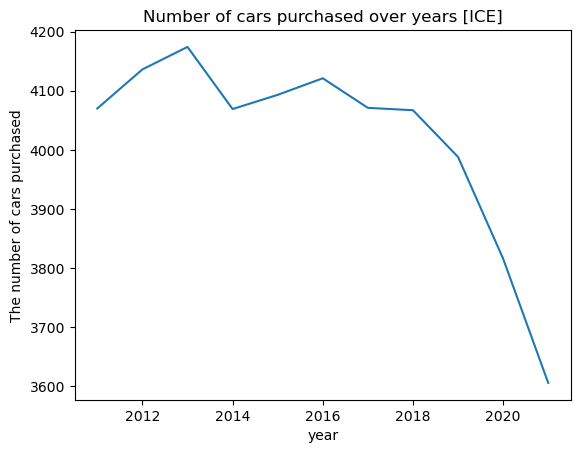

In [11]:
plt.title('Number of cars purchased over years [ICE]')
plt.xlabel('year')
plt.ylabel('The number of cars purchased')
sns.lineplot(data=ice,x='year', y='count')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ice["count"], autolag ="AIC")
adf, pvalue,_,_,_,_ = adfuller(ice["count"])

print("ADF: ", round(adf,2))
print("p-value: ", round(pvalue,2))

ADF:  3.83
p-value:  1.0


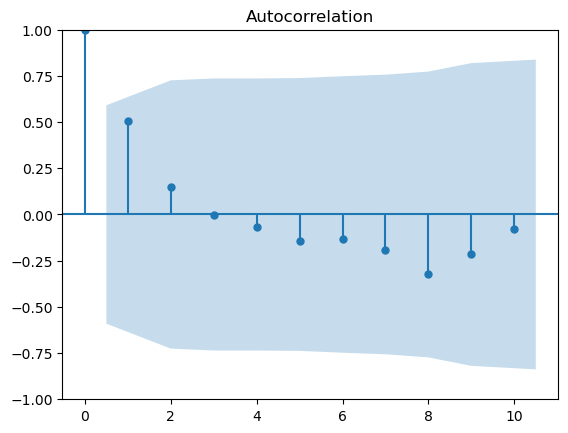

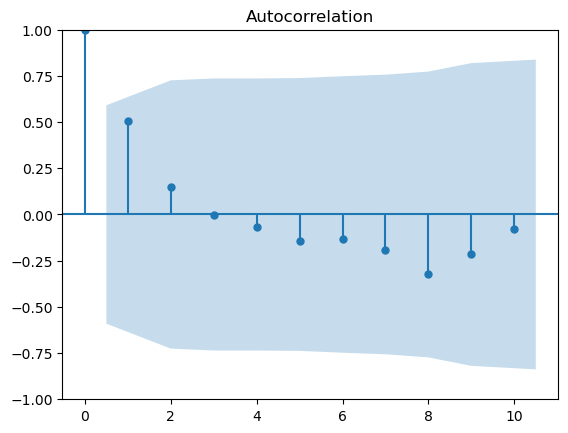

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ice["count"])

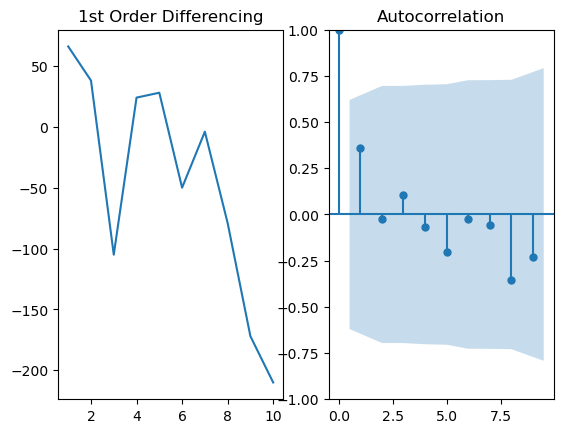

In [16]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(ice["count"].diff())

ax2 = f.add_subplot(122)
plot_acf(ice["count"].diff().dropna(), ax = ax2)
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [18]:
check_stationarity(ice["count"])

ADF Statistic: 3.828446
p-value: 1.000000
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Non-stationary


In [21]:
# 3rd Ordering
check_stationarity(ice["count"].diff().diff().diff().dropna())

ADF Statistic: -8.644582
p-value: 0.000000
Critical Values:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Stationary


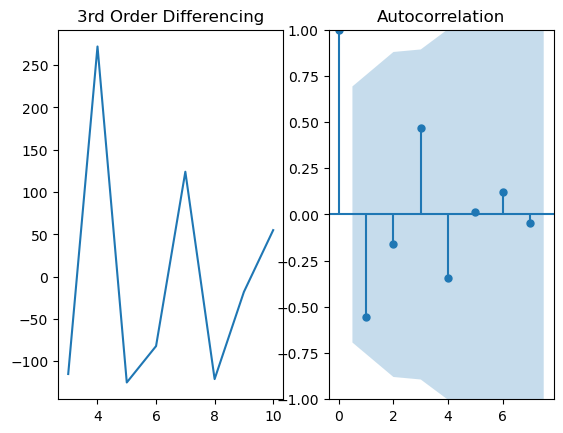

In [23]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("3rd Order Differencing")
ax1.plot(ice["count"].diff().diff().diff())

ax2 = f.add_subplot(122)
plot_acf(ice["count"].diff().diff().diff().dropna(), ax = ax2)
plt.show()


In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

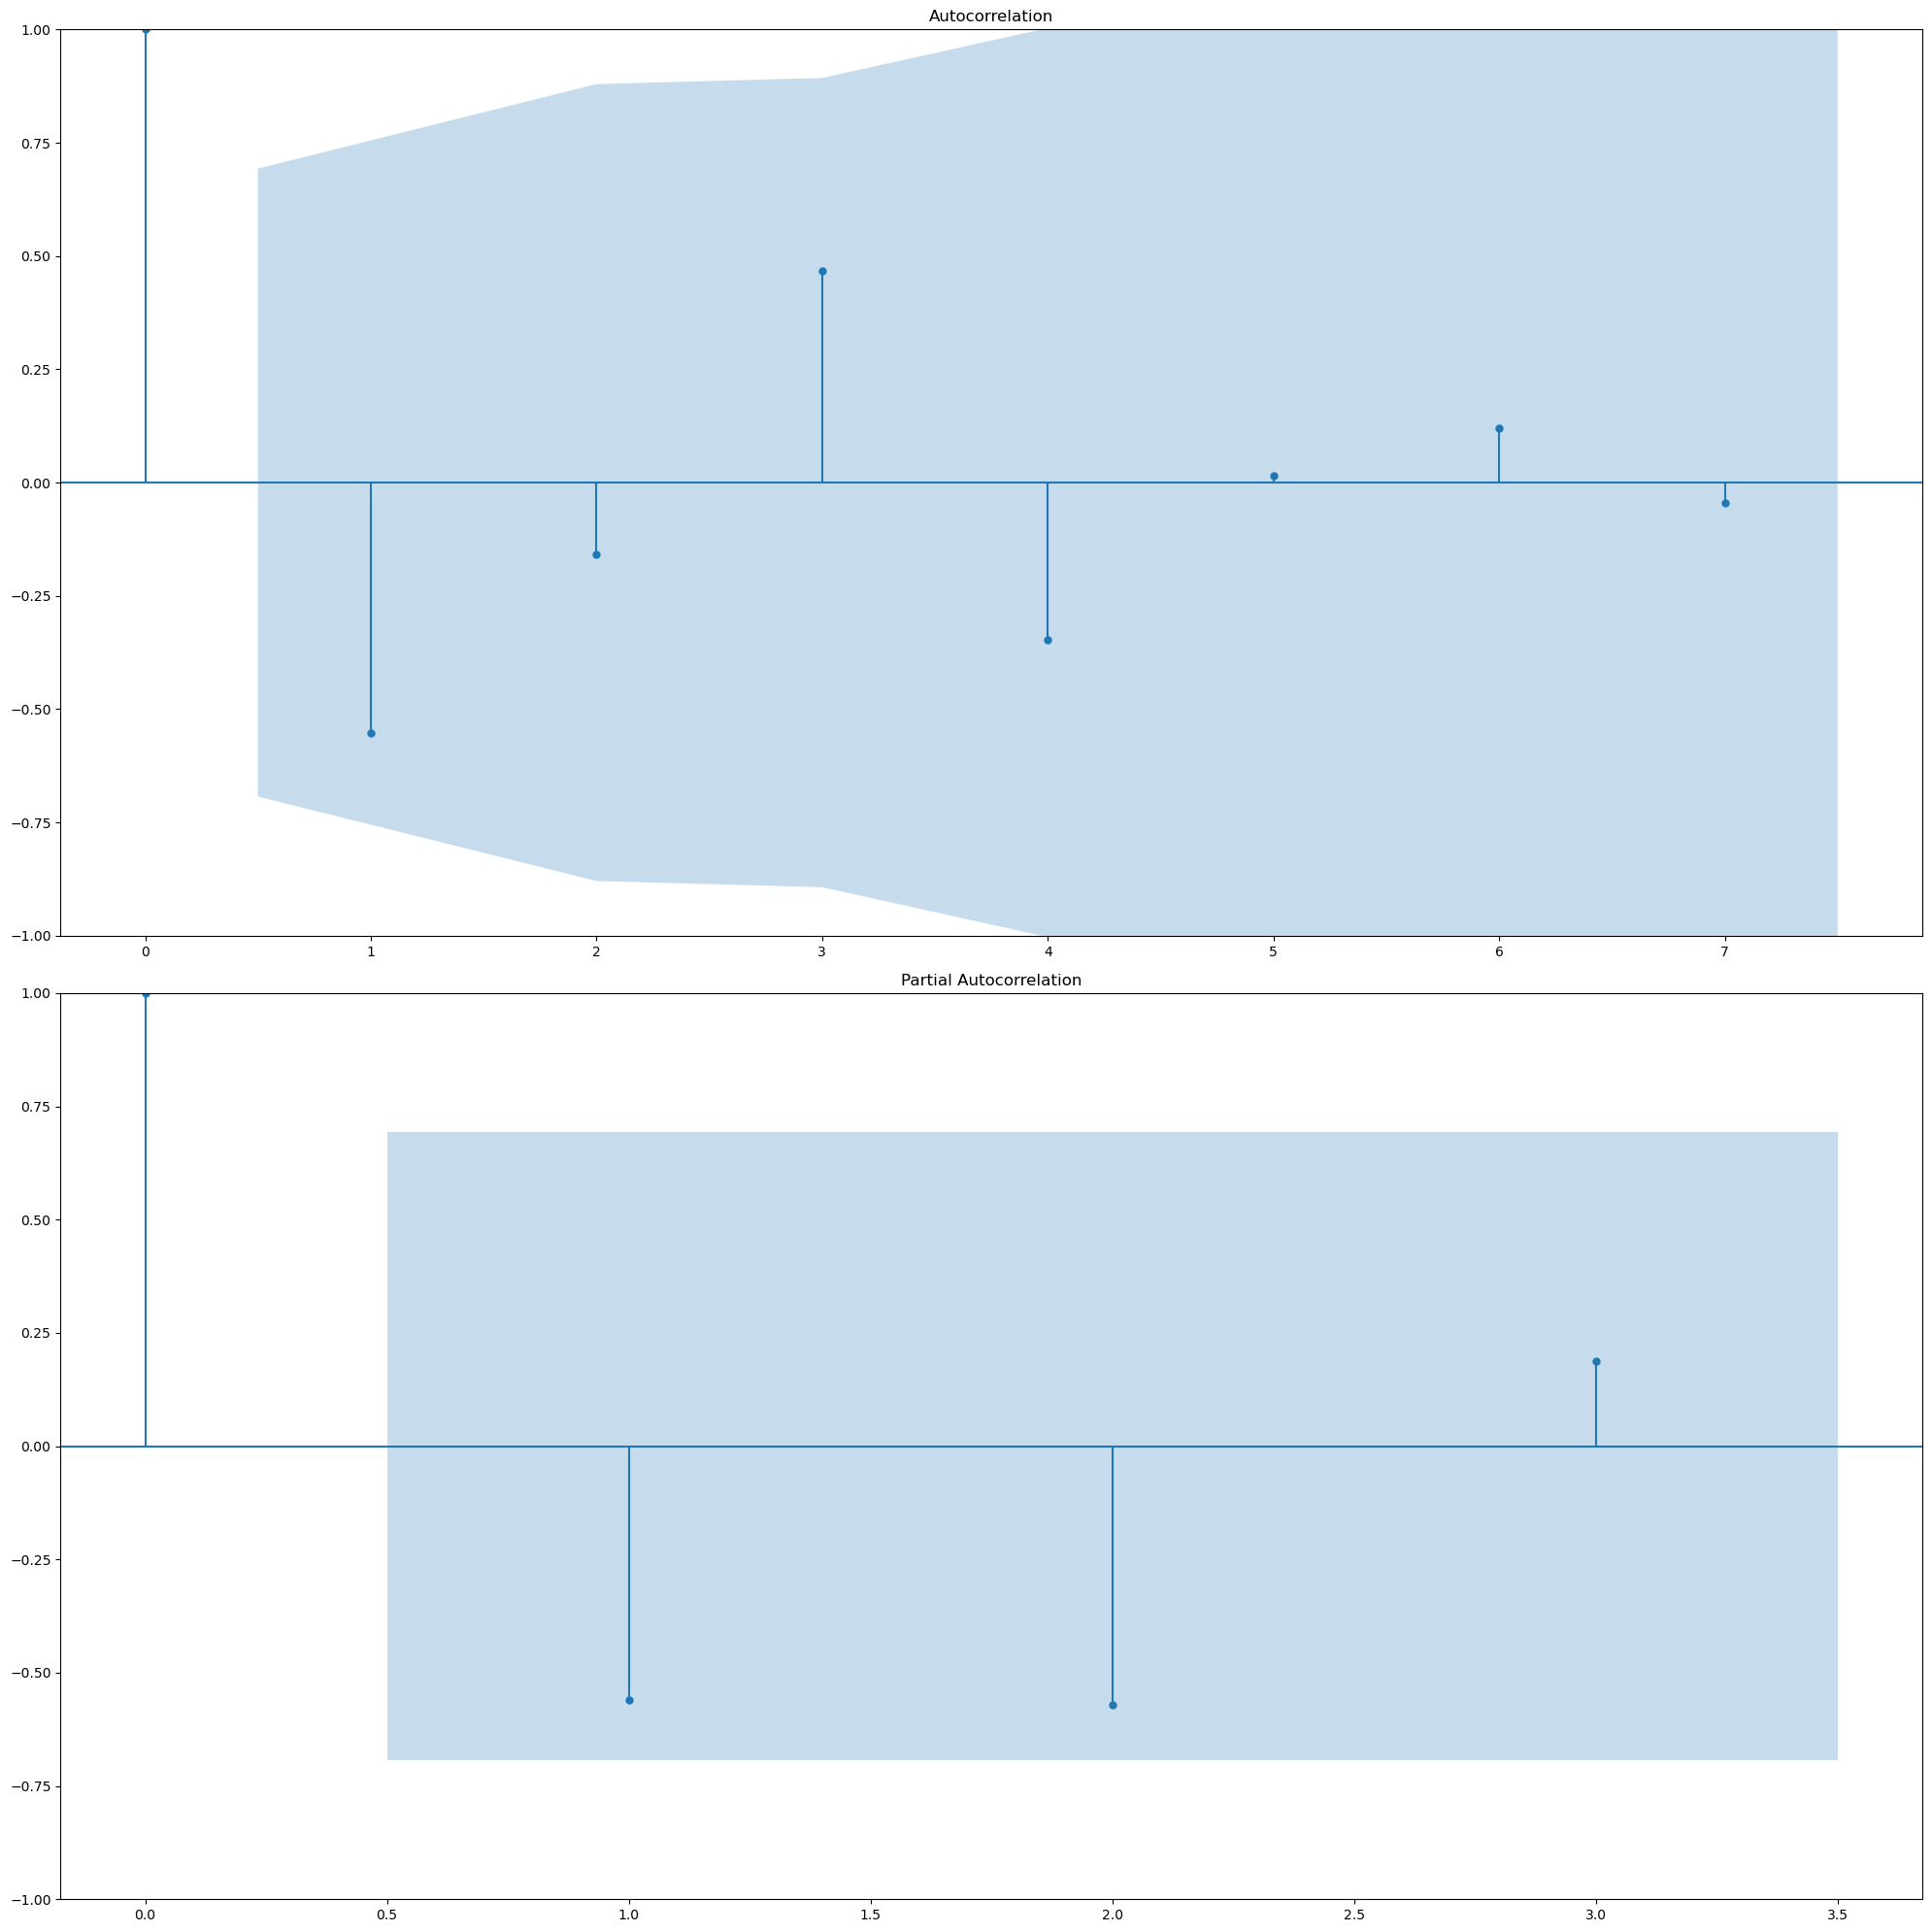

In [28]:
lag_acf = 10
lag_pacf = 4
height = 4
width = 12
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 2*10))
plot_acf(ice["count"].diff().diff().diff().dropna(), ax=ax[0])
plot_pacf(ice["count"].diff().diff().diff().dropna(),lags=3, ax=ax[1], method='ols')

# ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
#             xytext=(0.17, 0.75), textcoords='axes fraction',
#             arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

p = 2, q = 1, d = 3

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
df_test = ice[['year', 'count']].loc[9:]
df = ice[['year', 'count']].loc[:8]
df_test

,year,count
9,2020,3816
10,2021,3606


In [41]:
arima_model = ARIMA(df["count"], order=(1,3,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                    9
Model:                 ARIMA(1, 3, 2)   Log Likelihood                 -35.882
Date:                Sat, 28 Jan 2023   AIC                             79.764
Time:                        15:12:20   BIC                             78.931
Sample:                             0   HQIC                            76.429
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0522      3.541      0.015      0.988      -6.889       6.993
ma.L1         -1.8829    845.485     -0.002      0.998   -1659.004    1655.238
ma.L2          0.9983    900.576      0.001      0.9

c:\Users\harri\anaconda3\envs\dataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\harri\anaconda3\envs\dataScience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


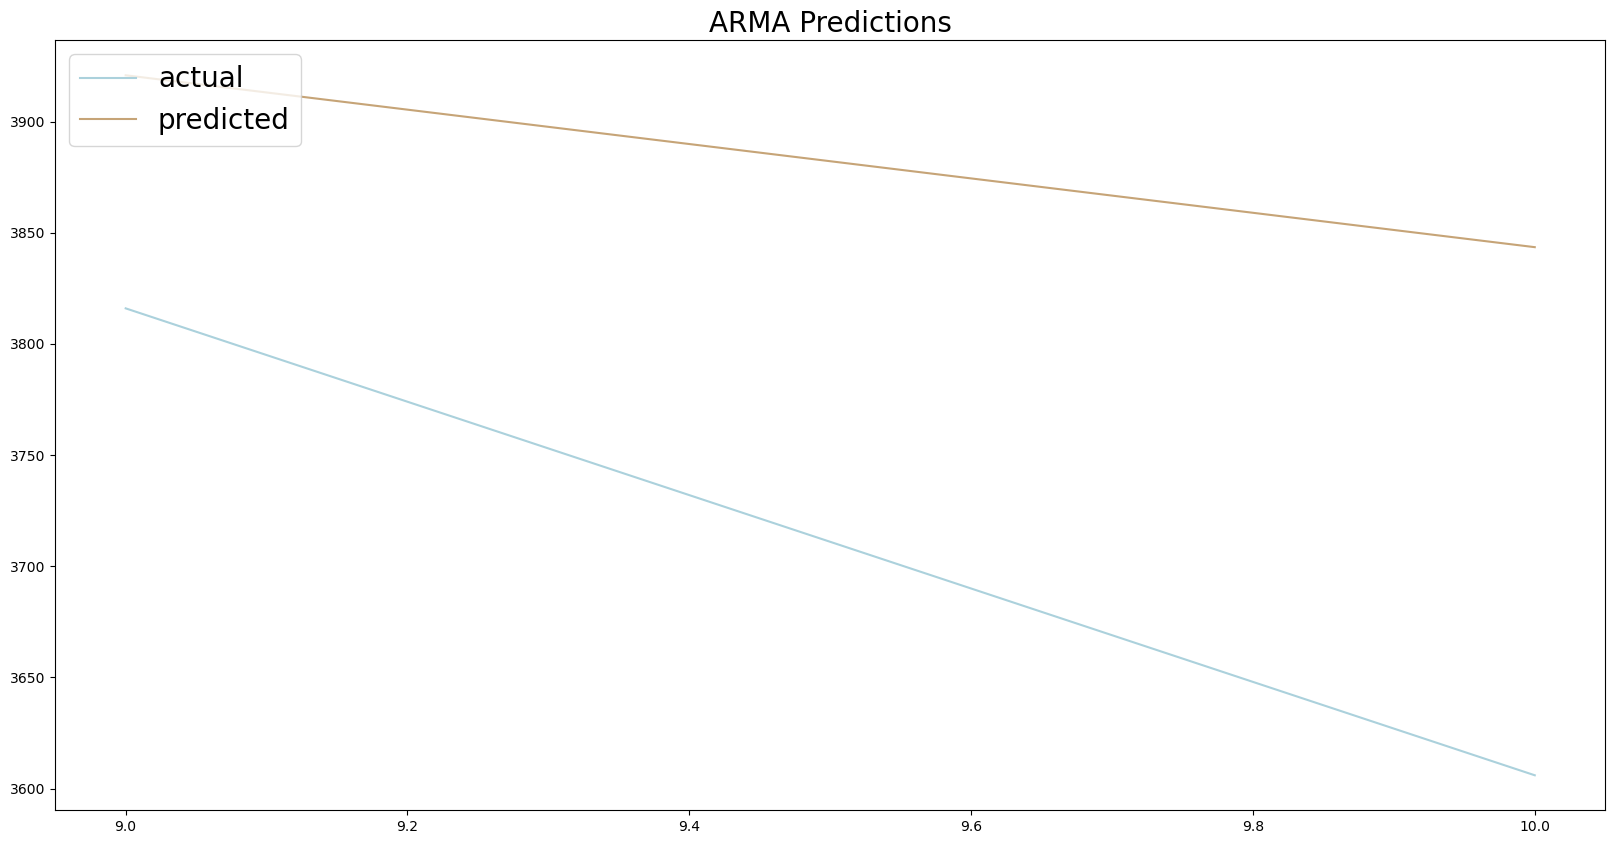

In [48]:
# generate predictions
df_pred = model.predict(start=9, end=10)
# plot actual vs. predicted
fig = plt.figure(figsize=(20, 10))
plt.title('ARMA Predictions', fontsize=20)
plt.plot(df_test['count'], label='actual', color='#ABD1DC')
plt.plot(df_pred, label='predicted', color='#C6A477')
plt.legend(fontsize =20, loc='upper left')

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                    9
Model:                 ARIMA(1, 3, 2)   Log Likelihood                 -35.882
Date:                Sat, 28 Jan 2023   AIC                             79.764
Time:                        15:14:12   BIC                             78.931
Sample:                             0   HQIC                            76.429
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0522      3.541      0.015      0.988      -6.889       6.993
ma.L1         -1.8829    845.485     -0.002      0.998   -1659.004    1655.238
ma.L2          0.9983    900.576      0.001      0.999   -1764.098    1766.095
sigma2      3711.6433   3.32e+06      0.001      0.999   -6.51e+06    6.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.47   Prob(JB):                         0.74
Heteroskedasticity (H):               0.16   Skew:                             0.50
Prob(H) (two-sided):                  0.28   Kurtosis:                         1.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**EV**

In [50]:
ev = data.query('carType == "EV"').groupby(["year"], as_index=False).count()
ev.rename(columns={"carType": "count"}, inplace=True)
ev

,year,count
0,2011,25
1,2012,44
2,2013,64
3,2014,80
4,2015,86
5,2016,114
6,2017,127
7,2018,134
8,2019,203
9,2020,436


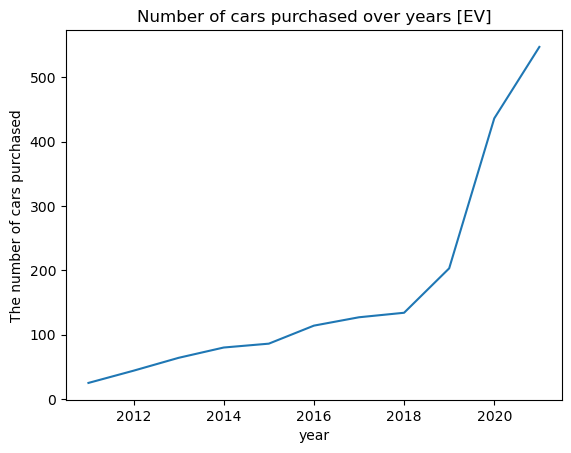

In [51]:
plt.title('Number of cars purchased over years [EV]')
plt.xlabel('year')
plt.ylabel('The number of cars purchased')
sns.lineplot(data=ev,x='year', y='count')
plt.show()

In [63]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) or (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [53]:
check_stationarity(ev["count"])

ADF Statistic: 1.288994
p-value: 0.996547
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Non-stationary


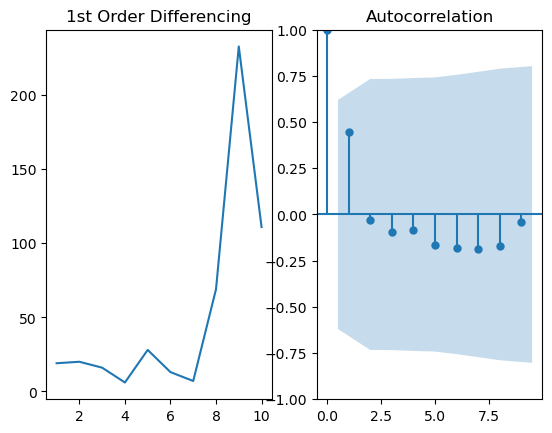

In [54]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(ev["count"].diff())

ax2 = f.add_subplot(122)
plot_acf(ev["count"].diff().dropna(), ax = ax2)
plt.show()

In [64]:
check_stationarity(ev["count"].diff().diff().dropna())

ADF Statistic: -3.186139
p-value: 0.020801
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Stationary


c:\Users\harri\anaconda3\envs\dataScience\lib\site-packages\matplotlib\axes\_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


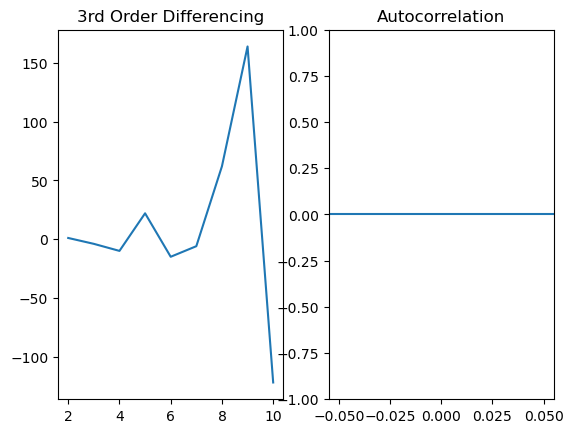

In [65]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("3rd Order Differencing")
ax1.plot(ev["count"].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(ev["count"].diff().diff(), ax = ax2)
plt.show()

All EV cars are automatic, not manual. All EVs are automatic. EVs are power-efficient throughout their revs, unlike fuel engines which have a narrow rev band in which they can deliver maximum performance. EVs need only one gear.(based on https://www.rivervaleleasing.co.uk/guides/electric-vehicle-leasing/are-electric-cars-automatic-or-manual#:~:text=reach%20maximum%20torque.-,Are%20electric%20cars%20automatic%20or%20manual%3F,EVs%20need%20only%20one%20gear.)

However, there is a few companies started to invent EV cars with manual transmission and introduced it around 2022 and it is still new!! (based on https://www.motorbiscuit.com/electric-vehicles-manual-transmissions/ and https://robbreport.com/motors/cars/manual-transmission-electric-vehicles-future-1234774864/)

In [8]:
gear_data = dict(data["gear"].value_counts())
gear_data

{'Manual': 30309, 'Automatic': 15706, 'Semi-automatic': 56}

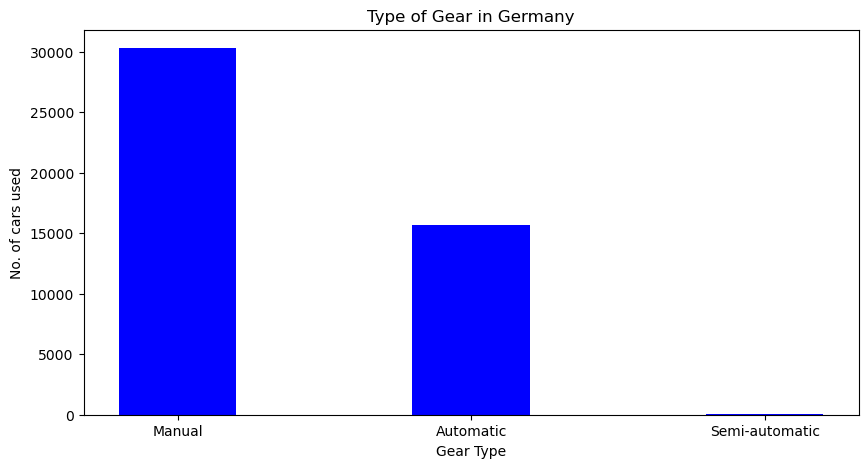

In [10]:
cat = list(gear_data.keys())
freq = list(gear_data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cat, freq,color ='blue',
        width = 0.4, label = list(map(str,gear_data.values())))
 
plt.xlabel("Gear Type")
plt.ylabel("No. of cars used")
plt.title("Type of Gear in Germany")
plt.show()

Based on the bar chart, cars with manual transmission are two times bigger than cars with automatics and it is less amount of cars with semi-automatic.

In [61]:
#check data with manual gear type
data.query('gear =="Manual"')


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [69]:
data["price"].min()

1100

In [62]:
data.query('gear =="Manual"')["fuel"].value_counts()

Gasoline             21804
Diesel                7922
Electric/Gasoline      301
LPG                    109
CNG                     95
Others                  37
-/- (Fuel)              16
Electric                16
Electric/Diesel          7
Ethanol                  2
Name: fuel, dtype: int64

Impossible! Records with manual gear should not have electric fuel.  

In [63]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline"')

,mileage,make,model,fuel,gear,offerType,price,hp,year
195,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10680,69.0,2021
197,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
394,9990,Ford,Fiesta,Electric/Gasoline,Manual,Employee's car,15970,125.0,2020
395,6315,Ford,Fiesta,Electric/Gasoline,Manual,Employee's car,16450,125.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [66]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')

,mileage,make,model,fuel,gear,offerType,price,hp,year
195,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10680,69.0,2021
197,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
999,10,Fiat,500C,Electric/Gasoline,Manual,Pre-registered,15990,69.0,2021
1000,10,Fiat,500C,Electric/Gasoline,Manual,Pre-registered,15990,69.0,2021
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [70]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')["offerType"].value_counts()

Pre-registered    134
Demonstration      23
Used                7
Name: offerType, dtype: int64

In [ ]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')["model"].value_counts()

In [60]:
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
temp2 = temp1.query('make=="Fiat" & model == "500"')
temp2

,mileage,make,model,fuel,gear,offerType,price,hp,year
1645,10,Fiat,500,Electric/Gasoline,Manual,Pre-registered,11488,69.0,2021
1836,15,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12780,69.0,2021
2647,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
2648,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
2649,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [44]:
manual_gear_data[manual_gear_data["fuel"]=="Electric/Gasoline"]["make"].value_counts()

Fiat          164
Ford           69
Suzuki         27
Hyundai        21
Mazda          14
Honda           4
Toyota          1
Volkswagen      1
Name: make, dtype: int64

In [30]:
fuel_feat = dict(data["fuel"].value_counts())
fuel_feat

{'Gasoline': 28720,
 'Diesel': 15178,
 'Electric/Gasoline': 1146,
 'Electric': 661,
 'LPG': 125,
 'CNG': 116,
 'Electric/Diesel': 53,
 'Others': 47,
 '-/- (Fuel)': 22,
 'Ethanol': 2,
 'Hydrogen': 1}

In [31]:
len(fuel_feat)

11

ICE - Gasoline, Diesel, LPG, CNG, Ethanol, Hydrogen, -/- (Fuel), 
EV - Electric/Gasoline, Electric, Electric/Diesel

In [33]:
temp_data = data[data["fuel"]=="Electric/Gasoline"]
temp_data

,mileage,make,model,fuel,gear,offerType,price,hp,year
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
63,84600,Toyota,Yaris,Electric/Gasoline,Automatic,Used,8990,143.0,2014
175,23490,Audi,A6,Electric/Gasoline,Automatic,Used,59440,367.0,2020
176,19000,Audi,Q5,Electric/Gasoline,Automatic,Demonstration,59850,367.0,2020
184,999,Audi,A7,Electric/Gasoline,Automatic,Used,66890,367.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [34]:
temp_data["gear"].value_counts()

Automatic    845
Manual       301
Name: gear, dtype: int64

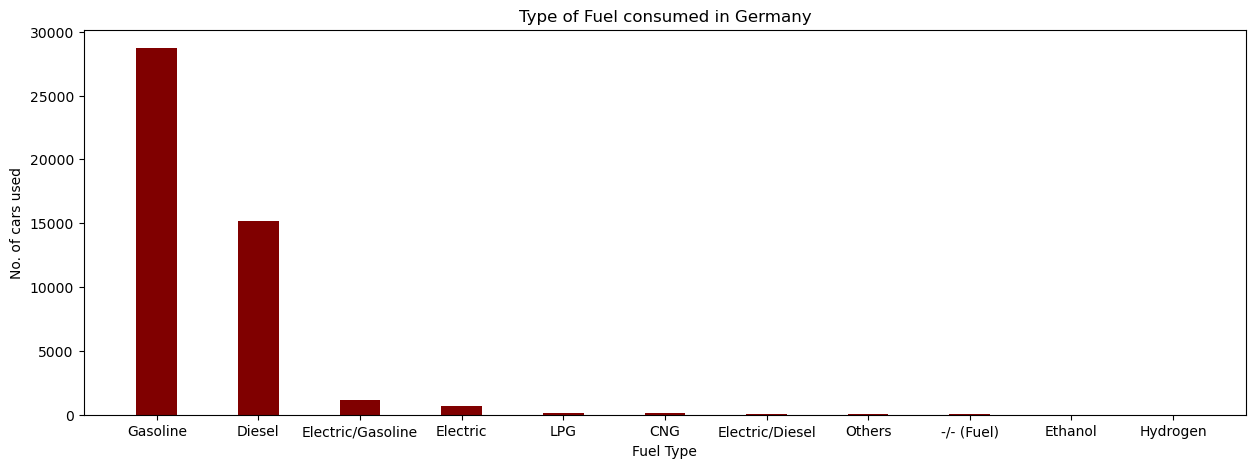

In [37]:
cat = list(fuel_feat.keys())
freq = list(fuel_feat.values())
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(cat, freq,color ='maroon',
        width = 0.4, label = list(map(str,fuel_feat.values())))
 
plt.xlabel("Fuel Type")
plt.ylabel("No. of cars used")
plt.title("Type of Fuel consumed in Germany")
plt.show()

In [15]:
data["offerType"].value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [14]:
data["gear"].value_counts()

Manual            30309
Automatic         15706
Semi-automatic       56
Name: gear, dtype: int64